# Lab 4:  Regularization

## Saturday, November 3rd 2018

### David Sondak and Pavlos Protopapas

# Background
Lecture 3 introduced several types of regularization.  In today's lab, you will become more familiar with those regularization techniques and actually apply them to a problem.  The types of regularization that you will explore today are:
* Penalization
* Early stopping
* Dropout
There are many other types of regularization (as mentioned in lecture).  The three regularization techniques that you will explore today are very popular and used frequently in real applications.

We'll begin the story by building a neural network to learn a function from some noisy data.

# Warming Up
Today we'll try to fit the function $$f\left(x\right) = x\sin\left(x\right).$$

Using `keras`, build a fully-connected neural network to fit $f\left(x\right)$.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import models
from keras import layers
%matplotlib inline

Using TensorFlow backend.


First, we'll generate some synthetic data with some synthetic noise.

In [2]:
n_samples = 100 # set the number of samples to take for each toy dataset
test_size = 0.2 # set the proportion of toy data to hold out for testing
random_seed = 1 # set the random seed to make the experiment reproducible 
np.random.seed(random_seed)

# define a function
f = lambda x: x * np.sin(x)

# Generate the truth function (without any noise)
X_true = np.linspace(0.0, 5.0, n_samples)
Y_true = f(X_true)

# Now sample the true function at some points
X = np.random.permutation(X_true) # choose some points from the function - this is our toy dataset 
Y = f(X)

Y = Y + np.random.normal(0.0, 1.0, len(Y)) # Add some noise from a random normal distribution

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

Now we'll build a network.  We choose $5$ hidden layers and $100$ nodes per layer.

In [3]:
num_layers = 5
N = 100

input_dim = 1

model = models.Sequential()

model.add(layers.Dense(N, input_dim=input_dim, activation='tanh'))

# Create hidden layers
for h in range(num_layers):
    model.add(layers.Dense(N, activation='tanh'))
    
model.add(layers.Dense(1, activation='linear'))

In [4]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

Next we'll fit the model.  

Notice that we're specifying a *validation set*.  What this means is that `keras` will further split the training set into a training part and a validation part.  The neural network will only be trained on the *training* set.  Meanwhile, `keras` will report performance metrics on the *validation* set so we can get a sense of how well the model has been trained.  We will be using the validation set quite a bit in this lab.

Remember, we don't want to use the test set for anything relating to the training of our models.  By withholding the validation set, we can assess the model performance on the validation set.  Later, we can see how the model performs on data it has never seen before by using in on the test set.

In [5]:
# Fit the model
no_reg = model.fit(X_train, Y_train, epochs=2500, batch_size=64, validation_split=0.2)

Train on 64 samples, validate on 16 samples
Epoch 1/2500
64/64 [==============================] - 1s 10ms/step - loss: 5.3071 - val_loss: 3.8413
Epoch 2/2500
64/64 [==============================] - 0s 126us/step - loss: 5.3797 - val_loss: 3.5319
Epoch 3/2500
64/64 [==============================] - 0s 100us/step - loss: 4.9824 - val_loss: 3.4028
Epoch 4/2500
64/64 [==============================] - 0s 330us/step - loss: 4.6934 - val_loss: 3.5651
Epoch 5/2500
64/64 [==============================] - 0s 478us/step - loss: 4.7462 - val_loss: 3.4562
Epoch 6/2500
64/64 [==============================] - 0s 260us/step - loss: 4.6230 - val_loss: 3.1192
Epoch 7/2500
64/64 [==============================] - 0s 103us/step - loss: 4.3425 - val_loss: 2.8796
Epoch 8/2500
64/64 [==============================] - 0s 110us/step - loss: 4.1979 - val_loss: 2.7926
Epoch 9/2500
64/64 [==============================] - 0s 513us/step - loss: 4.1805 - val_loss: 2.6417
Epoch 10/2500
64/64 [==================

Epoch 81/2500
64/64 [==============================] - 0s 115us/step - loss: 0.8970 - val_loss: 1.3788
Epoch 82/2500
64/64 [==============================] - 0s 65us/step - loss: 0.8989 - val_loss: 1.4678
Epoch 83/2500
64/64 [==============================] - 0s 79us/step - loss: 0.8974 - val_loss: 1.4584
Epoch 84/2500
64/64 [==============================] - 0s 108us/step - loss: 0.8955 - val_loss: 1.3793
Epoch 85/2500
64/64 [==============================] - 0s 75us/step - loss: 0.8971 - val_loss: 1.3956
Epoch 86/2500
64/64 [==============================] - 0s 77us/step - loss: 0.8923 - val_loss: 1.4554
Epoch 87/2500
64/64 [==============================] - 0s 58us/step - loss: 0.8956 - val_loss: 1.3967
Epoch 88/2500
64/64 [==============================] - 0s 164us/step - loss: 0.8898 - val_loss: 1.3421
Epoch 89/2500
64/64 [==============================] - 0s 100us/step - loss: 0.8931 - val_loss: 1.3771
Epoch 90/2500
64/64 [==============================] - 0s 60us/step - loss: 0.

Epoch 161/2500
64/64 [==============================] - 0s 74us/step - loss: 0.8772 - val_loss: 1.2632
Epoch 162/2500
64/64 [==============================] - 0s 81us/step - loss: 0.8772 - val_loss: 1.2611
Epoch 163/2500
64/64 [==============================] - 0s 162us/step - loss: 0.8771 - val_loss: 1.2636
Epoch 164/2500
64/64 [==============================] - 0s 93us/step - loss: 0.8771 - val_loss: 1.2607
Epoch 165/2500
64/64 [==============================] - 0s 76us/step - loss: 0.8771 - val_loss: 1.2624
Epoch 166/2500
64/64 [==============================] - 0s 161us/step - loss: 0.8770 - val_loss: 1.2617
Epoch 167/2500
64/64 [==============================] - 0s 62us/step - loss: 0.8770 - val_loss: 1.2609
Epoch 168/2500
64/64 [==============================] - 0s 67us/step - loss: 0.8769 - val_loss: 1.2625
Epoch 169/2500
64/64 [==============================] - 0s 81us/step - loss: 0.8769 - val_loss: 1.2601
Epoch 170/2500
64/64 [==============================] - 0s 136us/step -

Epoch 241/2500
64/64 [==============================] - 0s 64us/step - loss: 0.8810 - val_loss: 1.2739
Epoch 242/2500
64/64 [==============================] - 0s 229us/step - loss: 0.8757 - val_loss: 1.2075
Epoch 243/2500
64/64 [==============================] - 0s 79us/step - loss: 0.8822 - val_loss: 1.3013
Epoch 244/2500
64/64 [==============================] - 0s 53us/step - loss: 0.8795 - val_loss: 1.2552
Epoch 245/2500
64/64 [==============================] - 0s 117us/step - loss: 0.8753 - val_loss: 1.2009
Epoch 246/2500
64/64 [==============================] - 0s 176us/step - loss: 0.8800 - val_loss: 1.2841
Epoch 247/2500
64/64 [==============================] - 0s 70us/step - loss: 0.8785 - val_loss: 1.2431
Epoch 248/2500
64/64 [==============================] - 0s 83us/step - loss: 0.8751 - val_loss: 1.2030
Epoch 249/2500
64/64 [==============================] - 0s 145us/step - loss: 0.8783 - val_loss: 1.2789
Epoch 250/2500
64/64 [==============================] - 0s 62us/step 

Epoch 321/2500
64/64 [==============================] - 0s 56us/step - loss: 0.8719 - val_loss: 1.2249
Epoch 322/2500
64/64 [==============================] - 0s 137us/step - loss: 0.8719 - val_loss: 1.2261
Epoch 323/2500
64/64 [==============================] - 0s 78us/step - loss: 0.8719 - val_loss: 1.2237
Epoch 324/2500
64/64 [==============================] - 0s 138us/step - loss: 0.8718 - val_loss: 1.2255
Epoch 325/2500
64/64 [==============================] - 0s 66us/step - loss: 0.8718 - val_loss: 1.2241
Epoch 326/2500
64/64 [==============================] - 0s 84us/step - loss: 0.8718 - val_loss: 1.2239
Epoch 327/2500
64/64 [==============================] - 0s 147us/step - loss: 0.8717 - val_loss: 1.2247
Epoch 328/2500
64/64 [==============================] - 0s 67us/step - loss: 0.8717 - val_loss: 1.2228
Epoch 329/2500
64/64 [==============================] - 0s 65us/step - loss: 0.8717 - val_loss: 1.2243
Epoch 330/2500
64/64 [==============================] - 0s 89us/step -

Epoch 401/2500
64/64 [==============================] - 0s 356us/step - loss: 0.8691 - val_loss: 1.2054
Epoch 402/2500
64/64 [==============================] - 0s 78us/step - loss: 0.8691 - val_loss: 1.2050
Epoch 403/2500
64/64 [==============================] - 0s 137us/step - loss: 0.8691 - val_loss: 1.2049
Epoch 404/2500
64/64 [==============================] - 0s 176us/step - loss: 0.8690 - val_loss: 1.2045
Epoch 405/2500
64/64 [==============================] - 0s 76us/step - loss: 0.8690 - val_loss: 1.2045
Epoch 406/2500
64/64 [==============================] - 0s 242us/step - loss: 0.8689 - val_loss: 1.2040
Epoch 407/2500
64/64 [==============================] - 0s 61us/step - loss: 0.8689 - val_loss: 1.2041
Epoch 408/2500
64/64 [==============================] - 0s 70us/step - loss: 0.8689 - val_loss: 1.2034
Epoch 409/2500
64/64 [==============================] - 0s 49us/step - loss: 0.8688 - val_loss: 1.2037
Epoch 410/2500
64/64 [==============================] - 0s 123us/step

Epoch 481/2500
64/64 [==============================] - 0s 198us/step - loss: 0.8651 - val_loss: 1.2014
Epoch 482/2500
64/64 [==============================] - 0s 149us/step - loss: 0.8654 - val_loss: 1.1646
Epoch 483/2500
64/64 [==============================] - 0s 84us/step - loss: 0.8658 - val_loss: 1.2000
Epoch 484/2500
64/64 [==============================] - 0s 219us/step - loss: 0.8653 - val_loss: 1.1848
Epoch 485/2500
64/64 [==============================] - 0s 210us/step - loss: 0.8648 - val_loss: 1.1732
Epoch 486/2500
64/64 [==============================] - 0s 118us/step - loss: 0.8651 - val_loss: 1.2057
Epoch 487/2500
64/64 [==============================] - 0s 191us/step - loss: 0.8652 - val_loss: 1.1781
Epoch 488/2500
64/64 [==============================] - 0s 54us/step - loss: 0.8648 - val_loss: 1.1895
Epoch 489/2500
64/64 [==============================] - 0s 61us/step - loss: 0.8645 - val_loss: 1.2030
Epoch 490/2500
64/64 [==============================] - 0s 58us/ste

Epoch 561/2500
64/64 [==============================] - 0s 60us/step - loss: 0.8575 - val_loss: 1.1845
Epoch 562/2500
64/64 [==============================] - 0s 117us/step - loss: 0.8574 - val_loss: 1.1852
Epoch 563/2500
64/64 [==============================] - 0s 76us/step - loss: 0.8572 - val_loss: 1.1847
Epoch 564/2500
64/64 [==============================] - 0s 125us/step - loss: 0.8571 - val_loss: 1.1851
Epoch 565/2500
64/64 [==============================] - 0s 273us/step - loss: 0.8569 - val_loss: 1.1852
Epoch 566/2500
64/64 [==============================] - 0s 61us/step - loss: 0.8568 - val_loss: 1.1849
Epoch 567/2500
64/64 [==============================] - 0s 283us/step - loss: 0.8566 - val_loss: 1.1856
Epoch 568/2500
64/64 [==============================] - 0s 61us/step - loss: 0.8565 - val_loss: 1.1851
Epoch 569/2500
64/64 [==============================] - 0s 76us/step - loss: 0.8563 - val_loss: 1.1854
Epoch 570/2500
64/64 [==============================] - 0s 56us/step 

Epoch 641/2500
64/64 [==============================] - 0s 53us/step - loss: 0.8355 - val_loss: 1.1887
Epoch 642/2500
64/64 [==============================] - 0s 50us/step - loss: 0.8351 - val_loss: 1.1887
Epoch 643/2500
64/64 [==============================] - 0s 61us/step - loss: 0.8346 - val_loss: 1.1888
Epoch 644/2500
64/64 [==============================] - 0s 62us/step - loss: 0.8341 - val_loss: 1.1889
Epoch 645/2500
64/64 [==============================] - 0s 164us/step - loss: 0.8336 - val_loss: 1.1889
Epoch 646/2500
64/64 [==============================] - 0s 96us/step - loss: 0.8331 - val_loss: 1.1890
Epoch 647/2500
64/64 [==============================] - 0s 44us/step - loss: 0.8326 - val_loss: 1.1891
Epoch 648/2500
64/64 [==============================] - 0s 72us/step - loss: 0.8321 - val_loss: 1.1892
Epoch 649/2500
64/64 [==============================] - 0s 58us/step - loss: 0.8316 - val_loss: 1.1893
Epoch 650/2500
64/64 [==============================] - 0s 83us/step - l

Epoch 721/2500
64/64 [==============================] - 0s 48us/step - loss: 0.8014 - val_loss: 1.2172
Epoch 722/2500
64/64 [==============================] - 0s 122us/step - loss: 0.8012 - val_loss: 1.2175
Epoch 723/2500
64/64 [==============================] - 0s 67us/step - loss: 0.8011 - val_loss: 1.2178
Epoch 724/2500
64/64 [==============================] - 0s 52us/step - loss: 0.8009 - val_loss: 1.2181
Epoch 725/2500
64/64 [==============================] - 0s 63us/step - loss: 0.8008 - val_loss: 1.2184
Epoch 726/2500
64/64 [==============================] - 0s 55us/step - loss: 0.8006 - val_loss: 1.2186
Epoch 727/2500
64/64 [==============================] - 0s 269us/step - loss: 0.8004 - val_loss: 1.2188
Epoch 728/2500
64/64 [==============================] - 0s 52us/step - loss: 0.8003 - val_loss: 1.2191
Epoch 729/2500
64/64 [==============================] - 0s 45us/step - loss: 0.8001 - val_loss: 1.2193
Epoch 730/2500
64/64 [==============================] - 0s 64us/step - 

Epoch 801/2500
64/64 [==============================] - 0s 350us/step - loss: 0.7862 - val_loss: 1.2310
Epoch 802/2500
64/64 [==============================] - 0s 151us/step - loss: 0.7859 - val_loss: 1.2310
Epoch 803/2500
64/64 [==============================] - 0s 104us/step - loss: 0.7856 - val_loss: 1.2311
Epoch 804/2500
64/64 [==============================] - 0s 51us/step - loss: 0.7853 - val_loss: 1.2311
Epoch 805/2500
64/64 [==============================] - 0s 55us/step - loss: 0.7850 - val_loss: 1.2311
Epoch 806/2500
64/64 [==============================] - 0s 154us/step - loss: 0.7847 - val_loss: 1.2311
Epoch 807/2500
64/64 [==============================] - 0s 137us/step - loss: 0.7843 - val_loss: 1.2311
Epoch 808/2500
64/64 [==============================] - 0s 70us/step - loss: 0.7840 - val_loss: 1.2311
Epoch 809/2500
64/64 [==============================] - 0s 61us/step - loss: 0.7837 - val_loss: 1.2310
Epoch 810/2500
64/64 [==============================] - 0s 90us/step

Epoch 881/2500
64/64 [==============================] - 0s 101us/step - loss: 0.7430 - val_loss: 1.2261
Epoch 882/2500
64/64 [==============================] - 0s 128us/step - loss: 0.7423 - val_loss: 1.2263
Epoch 883/2500
64/64 [==============================] - 0s 60us/step - loss: 0.7416 - val_loss: 1.2265
Epoch 884/2500
64/64 [==============================] - 0s 50us/step - loss: 0.7410 - val_loss: 1.2266
Epoch 885/2500
64/64 [==============================] - 0s 67us/step - loss: 0.7403 - val_loss: 1.2268
Epoch 886/2500
64/64 [==============================] - 0s 70us/step - loss: 0.7396 - val_loss: 1.2270
Epoch 887/2500
64/64 [==============================] - 0s 262us/step - loss: 0.7389 - val_loss: 1.2272
Epoch 888/2500
64/64 [==============================] - 0s 49us/step - loss: 0.7383 - val_loss: 1.2274
Epoch 889/2500
64/64 [==============================] - 0s 57us/step - loss: 0.7376 - val_loss: 1.2275
Epoch 890/2500
64/64 [==============================] - 0s 121us/step 

Epoch 961/2500
64/64 [==============================] - 0s 138us/step - loss: 0.7129 - val_loss: 1.1897
Epoch 962/2500
64/64 [==============================] - 0s 69us/step - loss: 0.7128 - val_loss: 1.2338
Epoch 963/2500
64/64 [==============================] - 0s 210us/step - loss: 0.7129 - val_loss: 1.1575
Epoch 964/2500
64/64 [==============================] - 0s 114us/step - loss: 0.7134 - val_loss: 1.2865
Epoch 965/2500
64/64 [==============================] - 0s 89us/step - loss: 0.7154 - val_loss: 1.0695
Epoch 966/2500
64/64 [==============================] - 0s 187us/step - loss: 0.7214 - val_loss: 1.4422
Epoch 967/2500
64/64 [==============================] - 0s 56us/step - loss: 0.7388 - val_loss: 0.8881
Epoch 968/2500
64/64 [==============================] - 0s 81us/step - loss: 0.7833 - val_loss: 1.7557
Epoch 969/2500
64/64 [==============================] - 0s 65us/step - loss: 0.8701 - val_loss: 0.7941
Epoch 970/2500
64/64 [==============================] - 0s 59us/step 

Epoch 1040/2500
64/64 [==============================] - 0s 226us/step - loss: 0.7023 - val_loss: 1.1748
Epoch 1041/2500
64/64 [==============================] - 0s 87us/step - loss: 0.7021 - val_loss: 1.1492
Epoch 1042/2500
64/64 [==============================] - 0s 284us/step - loss: 0.7021 - val_loss: 1.1809
Epoch 1043/2500
64/64 [==============================] - 0s 51us/step - loss: 0.7018 - val_loss: 1.1710
Epoch 1044/2500
64/64 [==============================] - 0s 83us/step - loss: 0.7016 - val_loss: 1.1498
Epoch 1045/2500
64/64 [==============================] - 0s 254us/step - loss: 0.7015 - val_loss: 1.1792
Epoch 1046/2500
64/64 [==============================] - 0s 106us/step - loss: 0.7013 - val_loss: 1.1714
Epoch 1047/2500
64/64 [==============================] - 0s 310us/step - loss: 0.7011 - val_loss: 1.1516
Epoch 1048/2500
64/64 [==============================] - 0s 107us/step - loss: 0.7010 - val_loss: 1.1765
Epoch 1049/2500
64/64 [==============================] - 0

Epoch 1119/2500
64/64 [==============================] - 0s 282us/step - loss: 0.6856 - val_loss: 1.1149
Epoch 1120/2500
64/64 [==============================] - 0s 88us/step - loss: 0.6853 - val_loss: 1.1136
Epoch 1121/2500
64/64 [==============================] - 0s 67us/step - loss: 0.6850 - val_loss: 1.1135
Epoch 1122/2500
64/64 [==============================] - 0s 213us/step - loss: 0.6847 - val_loss: 1.1123
Epoch 1123/2500
64/64 [==============================] - 0s 57us/step - loss: 0.6845 - val_loss: 1.1115
Epoch 1124/2500
64/64 [==============================] - 0s 85us/step - loss: 0.6842 - val_loss: 1.1111
Epoch 1125/2500
64/64 [==============================] - 0s 70us/step - loss: 0.6839 - val_loss: 1.1098
Epoch 1126/2500
64/64 [==============================] - 0s 52us/step - loss: 0.6836 - val_loss: 1.1095
Epoch 1127/2500
64/64 [==============================] - 0s 72us/step - loss: 0.6833 - val_loss: 1.1085
Epoch 1128/2500
64/64 [==============================] - 0s 61

Epoch 1198/2500
64/64 [==============================] - 0s 47us/step - loss: 0.6563 - val_loss: 1.0680
Epoch 1199/2500
64/64 [==============================] - 0s 204us/step - loss: 0.6558 - val_loss: 1.0645
Epoch 1200/2500
64/64 [==============================] - 0s 52us/step - loss: 0.6552 - val_loss: 1.0733
Epoch 1201/2500
64/64 [==============================] - 0s 59us/step - loss: 0.6547 - val_loss: 1.0575
Epoch 1202/2500
64/64 [==============================] - 0s 45us/step - loss: 0.6543 - val_loss: 1.0914
Epoch 1203/2500
64/64 [==============================] - 0s 54us/step - loss: 0.6540 - val_loss: 1.0230
Epoch 1204/2500
64/64 [==============================] - 0s 159us/step - loss: 0.6547 - val_loss: 1.1735
Epoch 1205/2500
64/64 [==============================] - 0s 87us/step - loss: 0.6603 - val_loss: 0.8776
Epoch 1206/2500
64/64 [==============================] - 0s 46us/step - loss: 0.6857 - val_loss: 1.5181
Epoch 1207/2500
64/64 [==============================] - 0s 56

Epoch 1277/2500
64/64 [==============================] - 0s 51us/step - loss: 0.6447 - val_loss: 1.2377
Epoch 1278/2500
64/64 [==============================] - 0s 67us/step - loss: 0.6469 - val_loss: 0.8998
Epoch 1279/2500
64/64 [==============================] - 0s 97us/step - loss: 0.6488 - val_loss: 1.2467
Epoch 1280/2500
64/64 [==============================] - 0s 60us/step - loss: 0.6487 - val_loss: 0.8956
Epoch 1281/2500
64/64 [==============================] - 0s 55us/step - loss: 0.6474 - val_loss: 1.2232
Epoch 1282/2500
64/64 [==============================] - 0s 53us/step - loss: 0.6431 - val_loss: 0.9183
Epoch 1283/2500
64/64 [==============================] - 0s 66us/step - loss: 0.6377 - val_loss: 1.1746
Epoch 1284/2500
64/64 [==============================] - 0s 135us/step - loss: 0.6305 - val_loss: 0.9767
Epoch 1285/2500
64/64 [==============================] - 0s 66us/step - loss: 0.6232 - val_loss: 1.0887
Epoch 1286/2500
64/64 [==============================] - 0s 90u

Epoch 1356/2500
64/64 [==============================] - 0s 49us/step - loss: 0.5875 - val_loss: 1.0991
Epoch 1357/2500
64/64 [==============================] - 0s 186us/step - loss: 0.5857 - val_loss: 1.0705
Epoch 1358/2500
64/64 [==============================] - 0s 56us/step - loss: 0.5845 - val_loss: 1.0505
Epoch 1359/2500
64/64 [==============================] - 0s 54us/step - loss: 0.5847 - val_loss: 1.1004
Epoch 1360/2500
64/64 [==============================] - 0s 57us/step - loss: 0.5852 - val_loss: 1.0323
Epoch 1361/2500
64/64 [==============================] - 0s 178us/step - loss: 0.5854 - val_loss: 1.1038
Epoch 1362/2500
64/64 [==============================] - 0s 50us/step - loss: 0.5848 - val_loss: 1.0417
Epoch 1363/2500
64/64 [==============================] - 0s 64us/step - loss: 0.5837 - val_loss: 1.0726
Epoch 1364/2500
64/64 [==============================] - 0s 62us/step - loss: 0.5828 - val_loss: 1.0715
Epoch 1365/2500
64/64 [==============================] - 0s 43

Epoch 1435/2500
64/64 [==============================] - 0s 63us/step - loss: 0.6903 - val_loss: 0.8459
Epoch 1436/2500
64/64 [==============================] - 0s 55us/step - loss: 0.6689 - val_loss: 0.6805
Epoch 1437/2500
64/64 [==============================] - 0s 107us/step - loss: 0.7639 - val_loss: 1.0556
Epoch 1438/2500
64/64 [==============================] - 0s 62us/step - loss: 0.6473 - val_loss: 1.6946
Epoch 1439/2500
64/64 [==============================] - 0s 49us/step - loss: 0.7364 - val_loss: 1.1750
Epoch 1440/2500
64/64 [==============================] - 0s 54us/step - loss: 0.6274 - val_loss: 0.8939
Epoch 1441/2500
64/64 [==============================] - 0s 142us/step - loss: 0.6782 - val_loss: 0.9069
Epoch 1442/2500
64/64 [==============================] - 0s 117us/step - loss: 0.6633 - val_loss: 1.1987
Epoch 1443/2500
64/64 [==============================] - 0s 60us/step - loss: 0.6263 - val_loss: 1.5187
Epoch 1444/2500
64/64 [==============================] - 0s 7

Epoch 1514/2500
64/64 [==============================] - 0s 165us/step - loss: 0.5613 - val_loss: 1.0551
Epoch 1515/2500
64/64 [==============================] - 0s 64us/step - loss: 0.5611 - val_loss: 1.0512
Epoch 1516/2500
64/64 [==============================] - 0s 49us/step - loss: 0.5608 - val_loss: 1.0480
Epoch 1517/2500
64/64 [==============================] - 0s 52us/step - loss: 0.5606 - val_loss: 1.0566
Epoch 1518/2500
64/64 [==============================] - 0s 59us/step - loss: 0.5604 - val_loss: 1.0546
Epoch 1519/2500
64/64 [==============================] - 0s 101us/step - loss: 0.5601 - val_loss: 1.0491
Epoch 1520/2500
64/64 [==============================] - 0s 77us/step - loss: 0.5599 - val_loss: 1.0548
Epoch 1521/2500
64/64 [==============================] - 0s 73us/step - loss: 0.5597 - val_loss: 1.0540
Epoch 1522/2500
64/64 [==============================] - 0s 60us/step - loss: 0.5594 - val_loss: 1.0485
Epoch 1523/2500
64/64 [==============================] - 0s 60

Epoch 1593/2500
64/64 [==============================] - 0s 57us/step - loss: 0.5412 - val_loss: 1.0637
Epoch 1594/2500
64/64 [==============================] - 0s 62us/step - loss: 0.5410 - val_loss: 1.0639
Epoch 1595/2500
64/64 [==============================] - 0s 54us/step - loss: 0.5407 - val_loss: 1.0641
Epoch 1596/2500
64/64 [==============================] - 0s 70us/step - loss: 0.5404 - val_loss: 1.0646
Epoch 1597/2500
64/64 [==============================] - 0s 181us/step - loss: 0.5401 - val_loss: 1.0647
Epoch 1598/2500
64/64 [==============================] - 0s 97us/step - loss: 0.5398 - val_loss: 1.0651
Epoch 1599/2500
64/64 [==============================] - 0s 65us/step - loss: 0.5395 - val_loss: 1.0654
Epoch 1600/2500
64/64 [==============================] - 0s 192us/step - loss: 0.5392 - val_loss: 1.0656
Epoch 1601/2500
64/64 [==============================] - 0s 73us/step - loss: 0.5390 - val_loss: 1.0661
Epoch 1602/2500
64/64 [==============================] - 0s 52

Epoch 1672/2500
64/64 [==============================] - 0s 63us/step - loss: 0.5947 - val_loss: 0.7462
Epoch 1673/2500
64/64 [==============================] - 0s 142us/step - loss: 0.8021 - val_loss: 0.6155
Epoch 1674/2500
64/64 [==============================] - 0s 75us/step - loss: 0.8171 - val_loss: 1.1565
Epoch 1675/2500
64/64 [==============================] - 0s 102us/step - loss: 0.6709 - val_loss: 2.1095
Epoch 1676/2500
64/64 [==============================] - 0s 43us/step - loss: 1.1425 - val_loss: 1.9973
Epoch 1677/2500
64/64 [==============================] - 0s 59us/step - loss: 1.0201 - val_loss: 1.3377
Epoch 1678/2500
64/64 [==============================] - 0s 53us/step - loss: 0.7241 - val_loss: 0.9481
Epoch 1679/2500
64/64 [==============================] - 0s 89us/step - loss: 1.2953 - val_loss: 0.9667
Epoch 1680/2500
64/64 [==============================] - 0s 220us/step - loss: 0.7033 - val_loss: 2.3851
Epoch 1681/2500
64/64 [==============================] - 0s 1

Epoch 1751/2500
64/64 [==============================] - 0s 82us/step - loss: 0.5459 - val_loss: 0.9977
Epoch 1752/2500
64/64 [==============================] - 0s 112us/step - loss: 0.5459 - val_loss: 1.0503
Epoch 1753/2500
64/64 [==============================] - 0s 48us/step - loss: 0.5446 - val_loss: 1.0107
Epoch 1754/2500
64/64 [==============================] - 0s 55us/step - loss: 0.5429 - val_loss: 1.0238
Epoch 1755/2500
64/64 [==============================] - 0s 54us/step - loss: 0.5418 - val_loss: 1.0389
Epoch 1756/2500
64/64 [==============================] - 0s 172us/step - loss: 0.5416 - val_loss: 1.0073
Epoch 1757/2500
64/64 [==============================] - 0s 53us/step - loss: 0.5417 - val_loss: 1.0547
Epoch 1758/2500
64/64 [==============================] - 0s 62us/step - loss: 0.5415 - val_loss: 1.0055
Epoch 1759/2500
64/64 [==============================] - 0s 58us/step - loss: 0.5408 - val_loss: 1.0501
Epoch 1760/2500
64/64 [==============================] - 0s 65

Epoch 1830/2500
64/64 [==============================] - 0s 65us/step - loss: 0.5099 - val_loss: 1.0488
Epoch 1831/2500
64/64 [==============================] - 0s 73us/step - loss: 0.5094 - val_loss: 1.0678
Epoch 1832/2500
64/64 [==============================] - 0s 77us/step - loss: 0.5102 - val_loss: 1.0034
Epoch 1833/2500
64/64 [==============================] - 0s 72us/step - loss: 0.5136 - val_loss: 1.1117
Epoch 1834/2500
64/64 [==============================] - 0s 134us/step - loss: 0.5216 - val_loss: 0.9330
Epoch 1835/2500
64/64 [==============================] - 0s 58us/step - loss: 0.5464 - val_loss: 1.2000
Epoch 1836/2500
64/64 [==============================] - 0s 82us/step - loss: 0.5662 - val_loss: 0.8630
Epoch 1837/2500
64/64 [==============================] - 0s 73us/step - loss: 0.5981 - val_loss: 1.1758
Epoch 1838/2500
64/64 [==============================] - 0s 117us/step - loss: 0.5408 - val_loss: 1.0171
Epoch 1839/2500
64/64 [==============================] - 0s 84

Epoch 1909/2500
64/64 [==============================] - 0s 69us/step - loss: 0.4896 - val_loss: 1.1706
Epoch 1910/2500
64/64 [==============================] - 0s 66us/step - loss: 0.4977 - val_loss: 0.9898
Epoch 1911/2500
64/64 [==============================] - 0s 64us/step - loss: 0.5335 - val_loss: 1.2236
Epoch 1912/2500
64/64 [==============================] - 0s 58us/step - loss: 0.5445 - val_loss: 0.9242
Epoch 1913/2500
64/64 [==============================] - 0s 52us/step - loss: 0.5571 - val_loss: 1.1333
Epoch 1914/2500
64/64 [==============================] - 0s 62us/step - loss: 0.4984 - val_loss: 1.1557
Epoch 1915/2500
64/64 [==============================] - 0s 131us/step - loss: 0.5003 - val_loss: 0.9556
Epoch 1916/2500
64/64 [==============================] - 0s 77us/step - loss: 0.5552 - val_loss: 1.2540
Epoch 1917/2500
64/64 [==============================] - 0s 58us/step - loss: 0.5542 - val_loss: 0.9690
Epoch 1918/2500
64/64 [==============================] - 0s 90u

Epoch 1988/2500
64/64 [==============================] - 0s 70us/step - loss: 0.4807 - val_loss: 1.2565
Epoch 1989/2500
64/64 [==============================] - 0s 334us/step - loss: 0.5365 - val_loss: 0.9861
Epoch 1990/2500
64/64 [==============================] - 0s 99us/step - loss: 0.5347 - val_loss: 1.1110
Epoch 1991/2500
64/64 [==============================] - 0s 136us/step - loss: 0.4826 - val_loss: 1.2568
Epoch 1992/2500
64/64 [==============================] - 0s 84us/step - loss: 0.5358 - val_loss: 1.0081
Epoch 1993/2500
64/64 [==============================] - 0s 65us/step - loss: 0.5212 - val_loss: 1.0921
Epoch 1994/2500
64/64 [==============================] - 0s 77us/step - loss: 0.4880 - val_loss: 1.2607
Epoch 1995/2500
64/64 [==============================] - 0s 176us/step - loss: 0.5250 - val_loss: 1.0867
Epoch 1996/2500
64/64 [==============================] - 0s 70us/step - loss: 0.4909 - val_loss: 1.0497
Epoch 1997/2500
64/64 [==============================] - 0s 1

Epoch 2067/2500
64/64 [==============================] - 0s 189us/step - loss: 0.5026 - val_loss: 1.1218
Epoch 2068/2500
64/64 [==============================] - 0s 61us/step - loss: 0.5072 - val_loss: 0.9999
Epoch 2069/2500
64/64 [==============================] - 0s 54us/step - loss: 0.5105 - val_loss: 1.0476
Epoch 2070/2500
64/64 [==============================] - 0s 74us/step - loss: 0.5013 - val_loss: 1.1914
Epoch 2071/2500
64/64 [==============================] - 0s 68us/step - loss: 0.5066 - val_loss: 1.1562
Epoch 2072/2500
64/64 [==============================] - 0s 75us/step - loss: 0.4860 - val_loss: 1.0827
Epoch 2073/2500
64/64 [==============================] - 0s 70us/step - loss: 0.4976 - val_loss: 1.1513
Epoch 2074/2500
64/64 [==============================] - 0s 76us/step - loss: 0.4824 - val_loss: 1.2106
Epoch 2075/2500
64/64 [==============================] - 0s 257us/step - loss: 0.4932 - val_loss: 1.1647
Epoch 2076/2500
64/64 [==============================] - 0s 58

Epoch 2146/2500
64/64 [==============================] - 0s 79us/step - loss: 0.4555 - val_loss: 1.1278
Epoch 2147/2500
64/64 [==============================] - 0s 107us/step - loss: 0.4554 - val_loss: 1.1337
Epoch 2148/2500
64/64 [==============================] - 0s 297us/step - loss: 0.4552 - val_loss: 1.1282
Epoch 2149/2500
64/64 [==============================] - 0s 67us/step - loss: 0.4550 - val_loss: 1.1327
Epoch 2150/2500
64/64 [==============================] - 0s 147us/step - loss: 0.4548 - val_loss: 1.1303
Epoch 2151/2500
64/64 [==============================] - 0s 61us/step - loss: 0.4546 - val_loss: 1.1325
Epoch 2152/2500
64/64 [==============================] - 0s 60us/step - loss: 0.4545 - val_loss: 1.1332
Epoch 2153/2500
64/64 [==============================] - 0s 66us/step - loss: 0.4543 - val_loss: 1.1323
Epoch 2154/2500
64/64 [==============================] - 0s 190us/step - loss: 0.4541 - val_loss: 1.1348
Epoch 2155/2500
64/64 [==============================] - 0s 

Epoch 2225/2500
64/64 [==============================] - 0s 64us/step - loss: 0.4575 - val_loss: 1.1836
Epoch 2226/2500
64/64 [==============================] - 0s 61us/step - loss: 0.4548 - val_loss: 1.1236
Epoch 2227/2500
64/64 [==============================] - 0s 289us/step - loss: 0.4530 - val_loss: 1.1799
Epoch 2228/2500
64/64 [==============================] - 0s 63us/step - loss: 0.4500 - val_loss: 1.1359
Epoch 2229/2500
64/64 [==============================] - 0s 69us/step - loss: 0.4482 - val_loss: 1.1753
Epoch 2230/2500
64/64 [==============================] - 0s 54us/step - loss: 0.4463 - val_loss: 1.1442
Epoch 2231/2500
64/64 [==============================] - 0s 152us/step - loss: 0.4453 - val_loss: 1.1709
Epoch 2232/2500
64/64 [==============================] - 0s 58us/step - loss: 0.4444 - val_loss: 1.1468
Epoch 2233/2500
64/64 [==============================] - 0s 70us/step - loss: 0.4440 - val_loss: 1.1692
Epoch 2234/2500
64/64 [==============================] - 0s 75

Epoch 2304/2500
64/64 [==============================] - 0s 56us/step - loss: 0.4344 - val_loss: 1.2091
Epoch 2305/2500
64/64 [==============================] - 0s 73us/step - loss: 0.4371 - val_loss: 1.1484
Epoch 2306/2500
64/64 [==============================] - 0s 75us/step - loss: 0.4431 - val_loss: 1.1912
Epoch 2307/2500
64/64 [==============================] - 0s 87us/step - loss: 0.4505 - val_loss: 1.1141
Epoch 2308/2500
64/64 [==============================] - 0s 56us/step - loss: 0.4595 - val_loss: 1.2043
Epoch 2309/2500
64/64 [==============================] - 0s 253us/step - loss: 0.4592 - val_loss: 1.1321
Epoch 2310/2500
64/64 [==============================] - 0s 74us/step - loss: 0.4576 - val_loss: 1.2128
Epoch 2311/2500
64/64 [==============================] - 0s 57us/step - loss: 0.4522 - val_loss: 1.1433
Epoch 2312/2500
64/64 [==============================] - 0s 84us/step - loss: 0.4467 - val_loss: 1.1929
Epoch 2313/2500
64/64 [==============================] - 0s 144

Epoch 2383/2500
64/64 [==============================] - 0s 54us/step - loss: 0.4339 - val_loss: 1.1732
Epoch 2384/2500
64/64 [==============================] - 0s 277us/step - loss: 0.4417 - val_loss: 1.1372
Epoch 2385/2500
64/64 [==============================] - 0s 76us/step - loss: 0.4448 - val_loss: 1.2071
Epoch 2386/2500
64/64 [==============================] - 0s 64us/step - loss: 0.4317 - val_loss: 1.2159
Epoch 2387/2500
64/64 [==============================] - 0s 175us/step - loss: 0.4332 - val_loss: 1.1487
Epoch 2388/2500
64/64 [==============================] - 0s 99us/step - loss: 0.4434 - val_loss: 1.1728
Epoch 2389/2500
64/64 [==============================] - 0s 65us/step - loss: 0.4396 - val_loss: 1.1239
Epoch 2390/2500
64/64 [==============================] - 0s 65us/step - loss: 0.4307 - val_loss: 1.1371
Epoch 2391/2500
64/64 [==============================] - 0s 390us/step - loss: 0.4293 - val_loss: 1.1892
Epoch 2392/2500
64/64 [==============================] - 0s 6

Epoch 2462/2500
64/64 [==============================] - 0s 57us/step - loss: 0.4488 - val_loss: 1.2522
Epoch 2463/2500
64/64 [==============================] - 0s 64us/step - loss: 0.4560 - val_loss: 1.1540
Epoch 2464/2500
64/64 [==============================] - 0s 73us/step - loss: 0.4484 - val_loss: 1.1988
Epoch 2465/2500
64/64 [==============================] - 0s 170us/step - loss: 0.4226 - val_loss: 1.2207
Epoch 2466/2500
64/64 [==============================] - 0s 64us/step - loss: 0.4198 - val_loss: 1.2095
Epoch 2467/2500
64/64 [==============================] - 0s 54us/step - loss: 0.4372 - val_loss: 1.2826
Epoch 2468/2500
64/64 [==============================] - 0s 65us/step - loss: 0.4492 - val_loss: 1.1881
Epoch 2469/2500
64/64 [==============================] - 0s 354us/step - loss: 0.4457 - val_loss: 1.2186
Epoch 2470/2500
64/64 [==============================] - 0s 44us/step - loss: 0.4274 - val_loss: 1.1940
Epoch 2471/2500
64/64 [==============================] - 0s 65

Now the model is trained.  Let's see what the solution looks like.

We will also get the validation data set that `keras` created for us.  By plotting the validation data, we will gain some insight into how well the model generalizes.

In [6]:
# Validation set
X_val = no_reg.validation_data[0]
Y_val = no_reg.validation_data[1]

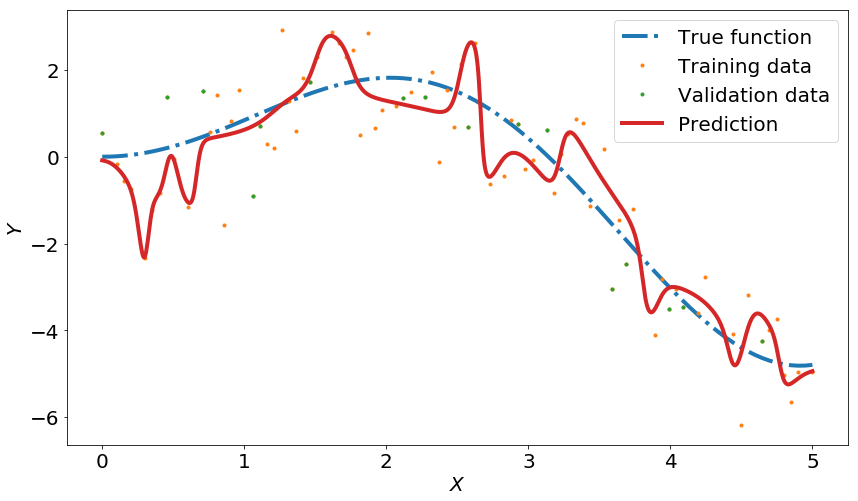

In [7]:
# use our model to predict in the range we want
X_range = np.linspace(0.0, 5, 1000)
y_pred = model.predict(X_range)

# Now plot everything
fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.plot(X_true, Y_true, ls='-.', lw=4, label='True function')
ax.plot(X_train, Y_train, '.', label='Training data')
ax.plot(X_val, Y_val, '.', label='Validation data')
ax.plot(X_range, y_pred, lw=4, label='Prediction')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

The prediction looks pretty bad.  The neural network model is trying to go through all the training points.  This is a classic case of overfitting.  The solution has a lot of oscillations and it rarely fits the validation data.  It may be a good idea to use some kind of regularization.

Let's begin with some penalization methods.

# Penalization
As mentioned in lecture, the loss function can be augmented by an additional term called the penalization term.  Mathematicall, the goal is to find the set of weights $W$ that minimize the functional $$J_{R}\left(W; X, y\right) = J\left(W; X, y\right) + \alpha\Omega\left(W\right)$$
where $\alpha$ is called the regularization (or penalization) parameter.  In this lab, $\displaystyle J\left(W; X, y\right)$ is the MSE loss function.

Next, we consider the effect of two different forms for the penalization term: $L_{1}$ and $L_{2}$ penalization.  For reference, 
$$\Omega_{L_{1}} = \frac{1}{2}\left\|W\right\|_{1}$$
and 
$$\Omega_{L_{2}} = \frac{1}{2}\|W\|^{2}_{2}.$$

Note that the biases are not being penalized.

## Exercise
Fit the same network as above ($5$ hidden layers, $100$ nodes per layer, linear output layer), but this time use $L_{2}$ and $L_{1}$ regularization.

**Deliverables:**
* Make two figures, one on top of the other.
* The first figure should contain the following:
  - True solution
  - Training data
  - Validation data
  - Neural network prediction without regularization
  - Neural network prediction with $L_{2}$ regularization
* The second figure should contain the following:
  - True solution
  - Training data
  - Validation data
  - Neural network prediction without regularization
  - Neural network prediction with $L_{1}$ regularization
* **Make sure everything is clearly labeled!**
* Discuss the results.

**Hints:**
* Use `kernel_regularizer=regularizers.l2(alpha)` after the `activation` argument in each of your layers.
* Choose a value for `alpha` that you think works well.  You may need to play around with this a little bit.
* See the `Keras` documentation on regularization:  [Usage of regularizers](https://keras.io/regularizers/)
* Here's some pseudo-code:

```python
from keras import regularizers

num_layers = 5
N = 100
alpha = 

input_dim = 1

### Create network
model_L2 = 
model_L2.add()


### Compile network
model_L2.compile()

### Fit model
L2_reg = model_L2.fit()

### Extract validation data
X_val_L2 = 
Y_val_L2 = 

### REPEAT FOR L1
###
###
###

# PLOT
fig, ax = plt.subplots(2, 1, figsize=(20,14), sharex=True)

ax[0].plot() # Top plots
### ...

ax[0].set_ylabel(r'$Y$', fontsize=20)
ax[0].tick_params(labelsize=20)
ax[0].legend(loc=1, fontsize=20)


ax[1].plot() # Bottom plots
### ...
ax[1].set_xlabel(r'$Y$', fontsize=20)
ax[1].set_ylabel(r'$Y$', fontsize=20)
ax[1].tick_params(labelsize=20)
ax[1].legend(loc=1, fontsize=20)

plt.show()
```

### $L_{2}$ Results

In [8]:
from keras import regularizers

num_layers = 5
N = 100
alpha = 0.005

input_dim = 1

model_L2 = models.Sequential()

model_L2.add(layers.Dense(N, input_dim=input_dim, kernel_initializer='normal', activation='tanh', 
                          kernel_regularizer=regularizers.l2(alpha)))

for h in range(num_layers):
    model_L2.add(layers.Dense(N, activation='tanh', kernel_regularizer=regularizers.l2(alpha)))
    
model_L2.add(layers.Dense(1, activation='linear', kernel_regularizer=regularizers.l2(alpha)))

In [9]:
model_L2.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
L2_reg = model_L2.fit(X_train, Y_train, epochs=2500, batch_size=64, validation_split=0.2)

Train on 64 samples, validate on 16 samples
Epoch 1/2500
64/64 [==============================] - 1s 11ms/step - loss: 8.4886 - val_loss: 6.2358
Epoch 2/2500
64/64 [==============================] - 0s 60us/step - loss: 7.4515 - val_loss: 5.9139
Epoch 3/2500
64/64 [==============================] - 0s 50us/step - loss: 7.2431 - val_loss: 5.9499
Epoch 4/2500
64/64 [==============================] - 0s 68us/step - loss: 7.3601 - val_loss: 5.8686
Epoch 5/2500
64/64 [==============================] - 0s 263us/step - loss: 7.2813 - val_loss: 5.7245
Epoch 6/2500
64/64 [==============================] - 0s 72us/step - loss: 7.0958 - val_loss: 5.6628
Epoch 7/2500
64/64 [==============================] - 0s 77us/step - loss: 6.9832 - val_loss: 5.6946
Epoch 8/2500
64/64 [==============================] - 0s 146us/step - loss: 6.9764 - val_loss: 5.7203
Epoch 9/2500
64/64 [==============================] - 0s 103us/step - loss: 6.9847 - val_loss: 5.6696
Epoch 10/2500
64/64 [=======================

Epoch 81/2500
64/64 [==============================] - 0s 78us/step - loss: 4.5799 - val_loss: 3.0802
Epoch 82/2500
64/64 [==============================] - 0s 99us/step - loss: 3.9516 - val_loss: 3.2071
Epoch 83/2500
64/64 [==============================] - 0s 67us/step - loss: 4.4136 - val_loss: 3.0998
Epoch 84/2500
64/64 [==============================] - 0s 58us/step - loss: 3.8356 - val_loss: 3.8705
Epoch 85/2500
64/64 [==============================] - 0s 69us/step - loss: 4.2507 - val_loss: 2.9260
Epoch 86/2500
64/64 [==============================] - 0s 55us/step - loss: 3.7712 - val_loss: 2.9918
Epoch 87/2500
64/64 [==============================] - 0s 304us/step - loss: 3.9861 - val_loss: 3.4189
Epoch 88/2500
64/64 [==============================] - 0s 71us/step - loss: 3.7670 - val_loss: 3.2593
Epoch 89/2500
64/64 [==============================] - 0s 56us/step - loss: 3.6119 - val_loss: 2.9235
Epoch 90/2500
64/64 [==============================] - 0s 131us/step - loss: 3.84

Epoch 161/2500
64/64 [==============================] - 0s 75us/step - loss: 2.6346 - val_loss: 2.8708
Epoch 162/2500
64/64 [==============================] - 0s 426us/step - loss: 2.6299 - val_loss: 2.8417
Epoch 163/2500
64/64 [==============================] - 0s 53us/step - loss: 2.6251 - val_loss: 2.8062
Epoch 164/2500
64/64 [==============================] - 0s 207us/step - loss: 2.6227 - val_loss: 2.8648
Epoch 165/2500
64/64 [==============================] - 0s 82us/step - loss: 2.6191 - val_loss: 2.8225
Epoch 166/2500
64/64 [==============================] - 0s 65us/step - loss: 2.6143 - val_loss: 2.8093
Epoch 167/2500
64/64 [==============================] - 0s 63us/step - loss: 2.6111 - val_loss: 2.8550
Epoch 168/2500
64/64 [==============================] - 0s 315us/step - loss: 2.6081 - val_loss: 2.8051
Epoch 169/2500
64/64 [==============================] - 0s 64us/step - loss: 2.6038 - val_loss: 2.8132
Epoch 170/2500
64/64 [==============================] - 0s 353us/step 

Epoch 241/2500
64/64 [==============================] - 0s 112us/step - loss: 2.3545 - val_loss: 2.7644
Epoch 242/2500
64/64 [==============================] - 0s 72us/step - loss: 2.4106 - val_loss: 2.3656
Epoch 243/2500
64/64 [==============================] - 0s 86us/step - loss: 2.4922 - val_loss: 2.7510
Epoch 244/2500
64/64 [==============================] - 0s 66us/step - loss: 2.4097 - val_loss: 2.5004
Epoch 245/2500
64/64 [==============================] - 0s 168us/step - loss: 2.3448 - val_loss: 2.3639
Epoch 246/2500
64/64 [==============================] - 0s 55us/step - loss: 2.4002 - val_loss: 2.7731
Epoch 247/2500
64/64 [==============================] - 0s 83us/step - loss: 2.4135 - val_loss: 2.4049
Epoch 248/2500
64/64 [==============================] - 0s 63us/step - loss: 2.3516 - val_loss: 2.4348
Epoch 249/2500
64/64 [==============================] - 0s 171us/step - loss: 2.3367 - val_loss: 2.7260
Epoch 250/2500
64/64 [==============================] - 0s 70us/step -

64/64 [==============================] - 0s 135us/step - loss: 2.3162 - val_loss: 2.7458
Epoch 321/2500
64/64 [==============================] - 0s 70us/step - loss: 2.2716 - val_loss: 2.2574
Epoch 322/2500
64/64 [==============================] - 0s 93us/step - loss: 2.2095 - val_loss: 2.4159
Epoch 323/2500
64/64 [==============================] - 0s 145us/step - loss: 2.1491 - val_loss: 2.4100
Epoch 324/2500
64/64 [==============================] - 0s 712us/step - loss: 2.1476 - val_loss: 2.2465
Epoch 325/2500
64/64 [==============================] - 0s 514us/step - loss: 2.1866 - val_loss: 2.5761
Epoch 326/2500
64/64 [==============================] - 0s 84us/step - loss: 2.1992 - val_loss: 2.2510
Epoch 327/2500
64/64 [==============================] - 0s 291us/step - loss: 2.1743 - val_loss: 2.4019
Epoch 328/2500
64/64 [==============================] - 0s 122us/step - loss: 2.1361 - val_loss: 2.3952
Epoch 329/2500
64/64 [==============================] - 0s 361us/step - loss: 2.13

Epoch 400/2500
64/64 [==============================] - 0s 60us/step - loss: 1.9982 - val_loss: 2.2593
Epoch 401/2500
64/64 [==============================] - 0s 61us/step - loss: 1.9966 - val_loss: 2.2634
Epoch 402/2500
64/64 [==============================] - 0s 140us/step - loss: 1.9949 - val_loss: 2.2547
Epoch 403/2500
64/64 [==============================] - 0s 92us/step - loss: 1.9933 - val_loss: 2.2615
Epoch 404/2500
64/64 [==============================] - 0s 81us/step - loss: 1.9917 - val_loss: 2.2520
Epoch 405/2500
64/64 [==============================] - 0s 60us/step - loss: 1.9900 - val_loss: 2.2577
Epoch 406/2500
64/64 [==============================] - 0s 139us/step - loss: 1.9884 - val_loss: 2.2504
Epoch 407/2500
64/64 [==============================] - 0s 95us/step - loss: 1.9868 - val_loss: 2.2527
Epoch 408/2500
64/64 [==============================] - 0s 52us/step - loss: 1.9851 - val_loss: 2.2493
Epoch 409/2500
64/64 [==============================] - 0s 59us/step - 

Epoch 480/2500
64/64 [==============================] - 0s 110us/step - loss: 1.9374 - val_loss: 2.4056
Epoch 481/2500
64/64 [==============================] - 0s 84us/step - loss: 1.9524 - val_loss: 2.0285
Epoch 482/2500
64/64 [==============================] - 0s 159us/step - loss: 1.9718 - val_loss: 2.4197
Epoch 483/2500
64/64 [==============================] - 0s 67us/step - loss: 1.9628 - val_loss: 2.0152
Epoch 484/2500
64/64 [==============================] - 0s 68us/step - loss: 1.9427 - val_loss: 2.2547
Epoch 485/2500
64/64 [==============================] - 0s 48us/step - loss: 1.9011 - val_loss: 2.0661
Epoch 486/2500
64/64 [==============================] - 0s 116us/step - loss: 1.8738 - val_loss: 2.0636
Epoch 487/2500
64/64 [==============================] - 0s 193us/step - loss: 1.8724 - val_loss: 2.2207
Epoch 488/2500
64/64 [==============================] - 0s 68us/step - loss: 1.8895 - val_loss: 2.0123
Epoch 489/2500
64/64 [==============================] - 0s 69us/step 

Epoch 560/2500
64/64 [==============================] - 0s 131us/step - loss: 1.7770 - val_loss: 2.0584
Epoch 561/2500
64/64 [==============================] - 0s 86us/step - loss: 1.7759 - val_loss: 2.0510
Epoch 562/2500
64/64 [==============================] - 0s 118us/step - loss: 1.7747 - val_loss: 2.0555
Epoch 563/2500
64/64 [==============================] - 0s 139us/step - loss: 1.7736 - val_loss: 2.0510
Epoch 564/2500
64/64 [==============================] - 0s 54us/step - loss: 1.7725 - val_loss: 2.0511
Epoch 565/2500
64/64 [==============================] - 0s 61us/step - loss: 1.7713 - val_loss: 2.0512
Epoch 566/2500
64/64 [==============================] - 0s 61us/step - loss: 1.7702 - val_loss: 2.0470
Epoch 567/2500
64/64 [==============================] - 0s 378us/step - loss: 1.7691 - val_loss: 2.0502
Epoch 568/2500
64/64 [==============================] - 0s 65us/step - loss: 1.7680 - val_loss: 2.0445
Epoch 569/2500
64/64 [==============================] - 0s 95us/step 

Epoch 640/2500
64/64 [==============================] - 0s 375us/step - loss: 1.6929 - val_loss: 1.9794
Epoch 641/2500
64/64 [==============================] - 0s 75us/step - loss: 1.6919 - val_loss: 1.9785
Epoch 642/2500
64/64 [==============================] - 0s 355us/step - loss: 1.6910 - val_loss: 1.9777
Epoch 643/2500
64/64 [==============================] - 0s 104us/step - loss: 1.6900 - val_loss: 1.9768
Epoch 644/2500
64/64 [==============================] - 0s 134us/step - loss: 1.6890 - val_loss: 1.9760
Epoch 645/2500
64/64 [==============================] - 0s 57us/step - loss: 1.6881 - val_loss: 1.9752
Epoch 646/2500
64/64 [==============================] - 0s 63us/step - loss: 1.6871 - val_loss: 1.9743
Epoch 647/2500
64/64 [==============================] - 0s 262us/step - loss: 1.6862 - val_loss: 1.9735
Epoch 648/2500
64/64 [==============================] - 0s 94us/step - loss: 1.6852 - val_loss: 1.9726
Epoch 649/2500
64/64 [==============================] - 0s 78us/step

Epoch 720/2500
64/64 [==============================] - 0s 75us/step - loss: 1.6210 - val_loss: 1.9170
Epoch 721/2500
64/64 [==============================] - 0s 246us/step - loss: 1.6201 - val_loss: 1.9163
Epoch 722/2500
64/64 [==============================] - 0s 55us/step - loss: 1.6193 - val_loss: 1.9155
Epoch 723/2500
64/64 [==============================] - 0s 90us/step - loss: 1.6185 - val_loss: 1.9148
Epoch 724/2500
64/64 [==============================] - 0s 371us/step - loss: 1.6177 - val_loss: 1.9141
Epoch 725/2500
64/64 [==============================] - 0s 81us/step - loss: 1.6168 - val_loss: 1.9134
Epoch 726/2500
64/64 [==============================] - 0s 81us/step - loss: 1.6160 - val_loss: 1.9127
Epoch 727/2500
64/64 [==============================] - 0s 121us/step - loss: 1.6152 - val_loss: 1.9120
Epoch 728/2500
64/64 [==============================] - 0s 61us/step - loss: 1.6144 - val_loss: 1.9113
Epoch 729/2500
64/64 [==============================] - 0s 66us/step -

Epoch 800/2500
64/64 [==============================] - 0s 71us/step - loss: 1.5592 - val_loss: 1.8650
Epoch 801/2500
64/64 [==============================] - 0s 58us/step - loss: 1.5584 - val_loss: 1.8644
Epoch 802/2500
64/64 [==============================] - 0s 169us/step - loss: 1.5577 - val_loss: 1.8638
Epoch 803/2500
64/64 [==============================] - 0s 160us/step - loss: 1.5570 - val_loss: 1.8632
Epoch 804/2500
64/64 [==============================] - 0s 72us/step - loss: 1.5563 - val_loss: 1.8627
Epoch 805/2500
64/64 [==============================] - 0s 59us/step - loss: 1.5556 - val_loss: 1.8621
Epoch 806/2500
64/64 [==============================] - 0s 275us/step - loss: 1.5549 - val_loss: 1.8615
Epoch 807/2500
64/64 [==============================] - 0s 87us/step - loss: 1.5542 - val_loss: 1.8609
Epoch 808/2500
64/64 [==============================] - 0s 62us/step - loss: 1.5535 - val_loss: 1.8603
Epoch 809/2500
64/64 [==============================] - 0s 66us/step -

Epoch 880/2500
64/64 [==============================] - 0s 310us/step - loss: 1.5058 - val_loss: 1.8213
Epoch 881/2500
64/64 [==============================] - 0s 76us/step - loss: 1.5052 - val_loss: 1.8208
Epoch 882/2500
64/64 [==============================] - 0s 73us/step - loss: 1.5046 - val_loss: 1.8203
Epoch 883/2500
64/64 [==============================] - 0s 194us/step - loss: 1.5040 - val_loss: 1.8198
Epoch 884/2500
64/64 [==============================] - 0s 94us/step - loss: 1.5034 - val_loss: 1.8193
Epoch 885/2500
64/64 [==============================] - 0s 61us/step - loss: 1.5027 - val_loss: 1.8188
Epoch 886/2500
64/64 [==============================] - 0s 115us/step - loss: 1.5021 - val_loss: 1.8183
Epoch 887/2500
64/64 [==============================] - 0s 131us/step - loss: 1.5015 - val_loss: 1.8178
Epoch 888/2500
64/64 [==============================] - 0s 64us/step - loss: 1.5009 - val_loss: 1.8173
Epoch 889/2500
64/64 [==============================] - 0s 73us/step 

64/64 [==============================] - 0s 436us/step - loss: 1.4601 - val_loss: 1.7842
Epoch 960/2500
64/64 [==============================] - 0s 63us/step - loss: 1.4595 - val_loss: 1.7838
Epoch 961/2500
64/64 [==============================] - 0s 262us/step - loss: 1.4590 - val_loss: 1.7833
Epoch 962/2500
64/64 [==============================] - 0s 96us/step - loss: 1.4585 - val_loss: 1.7829
Epoch 963/2500
64/64 [==============================] - 0s 400us/step - loss: 1.4579 - val_loss: 1.7825
Epoch 964/2500
64/64 [==============================] - 0s 92us/step - loss: 1.4574 - val_loss: 1.7820
Epoch 965/2500
64/64 [==============================] - 0s 472us/step - loss: 1.4568 - val_loss: 1.7816
Epoch 966/2500
64/64 [==============================] - 0s 79us/step - loss: 1.4563 - val_loss: 1.7811
Epoch 967/2500
64/64 [==============================] - 0s 96us/step - loss: 1.4558 - val_loss: 1.7807
Epoch 968/2500
64/64 [==============================] - 0s 62us/step - loss: 1.4552 

Epoch 1038/2500
64/64 [==============================] - 0s 80us/step - loss: 1.4200 - val_loss: 1.7514
Epoch 1039/2500
64/64 [==============================] - 0s 224us/step - loss: 1.4195 - val_loss: 1.7510
Epoch 1040/2500
64/64 [==============================] - 0s 105us/step - loss: 1.4189 - val_loss: 1.7506
Epoch 1041/2500
64/64 [==============================] - 0s 82us/step - loss: 1.4186 - val_loss: 1.7503
Epoch 1042/2500
64/64 [==============================] - 0s 70us/step - loss: 1.4181 - val_loss: 1.7499
Epoch 1043/2500
64/64 [==============================] - 0s 189us/step - loss: 1.4176 - val_loss: 1.7495
Epoch 1044/2500
64/64 [==============================] - 0s 89us/step - loss: 1.4172 - val_loss: 1.7491
Epoch 1045/2500
64/64 [==============================] - 0s 65us/step - loss: 1.4167 - val_loss: 1.7487
Epoch 1046/2500
64/64 [==============================] - 0s 299us/step - loss: 1.4162 - val_loss: 1.7483
Epoch 1047/2500
64/64 [==============================] - 0s 

Epoch 1117/2500
64/64 [==============================] - 0s 80us/step - loss: 1.3846 - val_loss: 1.7217
Epoch 1118/2500
64/64 [==============================] - 0s 135us/step - loss: 1.3842 - val_loss: 1.7214
Epoch 1119/2500
64/64 [==============================] - 0s 63us/step - loss: 1.3838 - val_loss: 1.7210
Epoch 1120/2500
64/64 [==============================] - 0s 77us/step - loss: 1.3833 - val_loss: 1.7206
Epoch 1121/2500
64/64 [==============================] - 0s 67us/step - loss: 1.3829 - val_loss: 1.7203
Epoch 1122/2500
64/64 [==============================] - 0s 122us/step - loss: 1.3825 - val_loss: 1.7199
Epoch 1123/2500
64/64 [==============================] - 0s 58us/step - loss: 1.3821 - val_loss: 1.7196
Epoch 1124/2500
64/64 [==============================] - 0s 60us/step - loss: 1.3817 - val_loss: 1.7192
Epoch 1125/2500
64/64 [==============================] - 0s 98us/step - loss: 1.3812 - val_loss: 1.7189
Epoch 1126/2500
64/64 [==============================] - 0s 11

Epoch 1196/2500
64/64 [==============================] - 0s 75us/step - loss: 1.3530 - val_loss: 1.6942
Epoch 1197/2500
64/64 [==============================] - 0s 197us/step - loss: 1.3527 - val_loss: 1.6938
Epoch 1198/2500
64/64 [==============================] - 0s 68us/step - loss: 1.3523 - val_loss: 1.6935
Epoch 1199/2500
64/64 [==============================] - 0s 113us/step - loss: 1.3519 - val_loss: 1.6932
Epoch 1200/2500
64/64 [==============================] - 0s 401us/step - loss: 1.3515 - val_loss: 1.6928
Epoch 1201/2500
64/64 [==============================] - 0s 87us/step - loss: 1.3511 - val_loss: 1.6925
Epoch 1202/2500
64/64 [==============================] - 0s 95us/step - loss: 1.3508 - val_loss: 1.6922
Epoch 1203/2500
64/64 [==============================] - 0s 195us/step - loss: 1.3504 - val_loss: 1.6918
Epoch 1204/2500
64/64 [==============================] - 0s 85us/step - loss: 1.3500 - val_loss: 1.6915
Epoch 1205/2500
64/64 [==============================] - 0s 

Epoch 1275/2500
64/64 [==============================] - 0s 68us/step - loss: 1.3246 - val_loss: 1.6682
Epoch 1276/2500
64/64 [==============================] - 0s 73us/step - loss: 1.3243 - val_loss: 1.6679
Epoch 1277/2500
64/64 [==============================] - 0s 143us/step - loss: 1.3239 - val_loss: 1.6675
Epoch 1278/2500
64/64 [==============================] - 0s 62us/step - loss: 1.3236 - val_loss: 1.6672
Epoch 1279/2500
64/64 [==============================] - 0s 76us/step - loss: 1.3232 - val_loss: 1.6669
Epoch 1280/2500
64/64 [==============================] - 0s 71us/step - loss: 1.3229 - val_loss: 1.6666
Epoch 1281/2500
64/64 [==============================] - 0s 119us/step - loss: 1.3225 - val_loss: 1.6663
Epoch 1282/2500
64/64 [==============================] - 0s 166us/step - loss: 1.3222 - val_loss: 1.6659
Epoch 1283/2500
64/64 [==============================] - 0s 81us/step - loss: 1.3219 - val_loss: 1.6656
Epoch 1284/2500
64/64 [==============================] - 0s 6

Epoch 1354/2500
64/64 [==============================] - 0s 77us/step - loss: 1.2988 - val_loss: 1.6433
Epoch 1355/2500
64/64 [==============================] - 0s 73us/step - loss: 1.2985 - val_loss: 1.6430
Epoch 1356/2500
64/64 [==============================] - 0s 72us/step - loss: 1.2982 - val_loss: 1.6427
Epoch 1357/2500
64/64 [==============================] - 0s 152us/step - loss: 1.2979 - val_loss: 1.6424
Epoch 1358/2500
64/64 [==============================] - 0s 77us/step - loss: 1.2976 - val_loss: 1.6421
Epoch 1359/2500
64/64 [==============================] - 0s 62us/step - loss: 1.2972 - val_loss: 1.6418
Epoch 1360/2500
64/64 [==============================] - 0s 77us/step - loss: 1.2969 - val_loss: 1.6415
Epoch 1361/2500
64/64 [==============================] - 0s 195us/step - loss: 1.2966 - val_loss: 1.6412
Epoch 1362/2500
64/64 [==============================] - 0s 91us/step - loss: 1.2963 - val_loss: 1.6409
Epoch 1363/2500
64/64 [==============================] - 0s 59

Epoch 1433/2500
64/64 [==============================] - 0s 75us/step - loss: 1.2752 - val_loss: 1.6194
Epoch 1434/2500
64/64 [==============================] - 0s 205us/step - loss: 1.2749 - val_loss: 1.6191
Epoch 1435/2500
64/64 [==============================] - 0s 103us/step - loss: 1.2746 - val_loss: 1.6188
Epoch 1436/2500
64/64 [==============================] - 0s 61us/step - loss: 1.2743 - val_loss: 1.6185
Epoch 1437/2500
64/64 [==============================] - 0s 63us/step - loss: 1.2740 - val_loss: 1.6182
Epoch 1438/2500
64/64 [==============================] - 0s 222us/step - loss: 1.2738 - val_loss: 1.6179
Epoch 1439/2500
64/64 [==============================] - 0s 96us/step - loss: 1.2735 - val_loss: 1.6176
Epoch 1440/2500
64/64 [==============================] - 0s 191us/step - loss: 1.2732 - val_loss: 1.6173
Epoch 1441/2500
64/64 [==============================] - 0s 67us/step - loss: 1.2729 - val_loss: 1.6170
Epoch 1442/2500
64/64 [==============================] - 0s 

Epoch 1512/2500
64/64 [==============================] - 0s 86us/step - loss: 1.2534 - val_loss: 1.5962
Epoch 1513/2500
64/64 [==============================] - 0s 172us/step - loss: 1.2532 - val_loss: 1.5959
Epoch 1514/2500
64/64 [==============================] - 0s 53us/step - loss: 1.2529 - val_loss: 1.5956
Epoch 1515/2500
64/64 [==============================] - 0s 60us/step - loss: 1.2527 - val_loss: 1.5953
Epoch 1516/2500
64/64 [==============================] - 0s 57us/step - loss: 1.2524 - val_loss: 1.5950
Epoch 1517/2500
64/64 [==============================] - 0s 314us/step - loss: 1.2521 - val_loss: 1.5947
Epoch 1518/2500
64/64 [==============================] - 0s 61us/step - loss: 1.2519 - val_loss: 1.5944
Epoch 1519/2500
64/64 [==============================] - 0s 66us/step - loss: 1.2516 - val_loss: 1.5942
Epoch 1520/2500
64/64 [==============================] - 0s 221us/step - loss: 1.2513 - val_loss: 1.5939
Epoch 1521/2500
64/64 [==============================] - 0s 6

Epoch 1591/2500
64/64 [==============================] - 0s 309us/step - loss: 1.2333 - val_loss: 1.5735
Epoch 1592/2500
64/64 [==============================] - 0s 245us/step - loss: 1.2330 - val_loss: 1.5732
Epoch 1593/2500
64/64 [==============================] - 0s 272us/step - loss: 1.2328 - val_loss: 1.5729
Epoch 1594/2500
64/64 [==============================] - 0s 93us/step - loss: 1.2326 - val_loss: 1.5727
Epoch 1595/2500
64/64 [==============================] - 0s 239us/step - loss: 1.2323 - val_loss: 1.5724
Epoch 1596/2500
64/64 [==============================] - 0s 165us/step - loss: 1.2321 - val_loss: 1.5721
Epoch 1597/2500
64/64 [==============================] - 0s 289us/step - loss: 1.2318 - val_loss: 1.5718
Epoch 1598/2500
64/64 [==============================] - 0s 91us/step - loss: 1.2316 - val_loss: 1.5715
Epoch 1599/2500
64/64 [==============================] - 0s 66us/step - loss: 1.2313 - val_loss: 1.5712
Epoch 1600/2500
64/64 [==============================] - 0

Epoch 1670/2500
64/64 [==============================] - 0s 197us/step - loss: 1.2145 - val_loss: 1.5512
Epoch 1671/2500
64/64 [==============================] - 0s 70us/step - loss: 1.2143 - val_loss: 1.5509
Epoch 1672/2500
64/64 [==============================] - 0s 111us/step - loss: 1.2141 - val_loss: 1.5507
Epoch 1673/2500
64/64 [==============================] - 0s 223us/step - loss: 1.2138 - val_loss: 1.5504
Epoch 1674/2500
64/64 [==============================] - 0s 74us/step - loss: 1.2136 - val_loss: 1.5501
Epoch 1675/2500
64/64 [==============================] - 0s 130us/step - loss: 1.2134 - val_loss: 1.5498
Epoch 1676/2500
64/64 [==============================] - 0s 292us/step - loss: 1.2132 - val_loss: 1.5495
Epoch 1677/2500
64/64 [==============================] - 0s 73us/step - loss: 1.2129 - val_loss: 1.5493
Epoch 1678/2500
64/64 [==============================] - 0s 103us/step - loss: 1.2127 - val_loss: 1.5490
Epoch 1679/2500
64/64 [==============================] - 0

Epoch 1749/2500
64/64 [==============================] - 0s 122us/step - loss: 1.1969 - val_loss: 1.5292
Epoch 1750/2500
64/64 [==============================] - 0s 83us/step - loss: 1.1968 - val_loss: 1.5289
Epoch 1751/2500
64/64 [==============================] - 0s 57us/step - loss: 1.1965 - val_loss: 1.5287
Epoch 1752/2500
64/64 [==============================] - 0s 77us/step - loss: 1.1963 - val_loss: 1.5284
Epoch 1753/2500
64/64 [==============================] - 0s 59us/step - loss: 1.1961 - val_loss: 1.5281
Epoch 1754/2500
64/64 [==============================] - 0s 156us/step - loss: 1.1959 - val_loss: 1.5278
Epoch 1755/2500
64/64 [==============================] - 0s 68us/step - loss: 1.1957 - val_loss: 1.5275
Epoch 1756/2500
64/64 [==============================] - 0s 95us/step - loss: 1.1955 - val_loss: 1.5273
Epoch 1757/2500
64/64 [==============================] - 0s 69us/step - loss: 1.1953 - val_loss: 1.5270
Epoch 1758/2500
64/64 [==============================] - 0s 74

Epoch 1828/2500
64/64 [==============================] - 0s 90us/step - loss: 1.1805 - val_loss: 1.5074
Epoch 1829/2500
64/64 [==============================] - 0s 61us/step - loss: 1.1803 - val_loss: 1.5071
Epoch 1830/2500
64/64 [==============================] - 0s 59us/step - loss: 1.1801 - val_loss: 1.5068
Epoch 1831/2500
64/64 [==============================] - 0s 74us/step - loss: 1.1799 - val_loss: 1.5066
Epoch 1832/2500
64/64 [==============================] - 0s 116us/step - loss: 1.1797 - val_loss: 1.5063
Epoch 1833/2500
64/64 [==============================] - 0s 86us/step - loss: 1.1795 - val_loss: 1.5060
Epoch 1834/2500
64/64 [==============================] - 0s 51us/step - loss: 1.1793 - val_loss: 1.5057
Epoch 1835/2500
64/64 [==============================] - 0s 94us/step - loss: 1.1791 - val_loss: 1.5055
Epoch 1836/2500
64/64 [==============================] - 0s 66us/step - loss: 1.1789 - val_loss: 1.5052
Epoch 1837/2500
64/64 [==============================] - 0s 177

Epoch 1907/2500
64/64 [==============================] - 0s 76us/step - loss: 1.1650 - val_loss: 1.4857
Epoch 1908/2500
64/64 [==============================] - 0s 58us/step - loss: 1.1648 - val_loss: 1.4855
Epoch 1909/2500
64/64 [==============================] - 0s 63us/step - loss: 1.1646 - val_loss: 1.4852
Epoch 1910/2500
64/64 [==============================] - 0s 65us/step - loss: 1.1644 - val_loss: 1.4849
Epoch 1911/2500
64/64 [==============================] - 0s 55us/step - loss: 1.1642 - val_loss: 1.4846
Epoch 1912/2500
64/64 [==============================] - 0s 65us/step - loss: 1.1640 - val_loss: 1.4844
Epoch 1913/2500
64/64 [==============================] - 0s 83us/step - loss: 1.1638 - val_loss: 1.4841
Epoch 1914/2500
64/64 [==============================] - 0s 66us/step - loss: 1.1636 - val_loss: 1.4838
Epoch 1915/2500
64/64 [==============================] - 0s 235us/step - loss: 1.1635 - val_loss: 1.4836
Epoch 1916/2500
64/64 [==============================] - 0s 64u

Epoch 1986/2500
64/64 [==============================] - 0s 72us/step - loss: 1.1504 - val_loss: 1.4644
Epoch 1987/2500
64/64 [==============================] - 0s 192us/step - loss: 1.1502 - val_loss: 1.4641
Epoch 1988/2500
64/64 [==============================] - 0s 160us/step - loss: 1.1500 - val_loss: 1.4638
Epoch 1989/2500
64/64 [==============================] - 0s 81us/step - loss: 1.1498 - val_loss: 1.4635
Epoch 1990/2500
64/64 [==============================] - 0s 114us/step - loss: 1.1497 - val_loss: 1.4633
Epoch 1991/2500
64/64 [==============================] - 0s 178us/step - loss: 1.1495 - val_loss: 1.4630
Epoch 1992/2500
64/64 [==============================] - 0s 75us/step - loss: 1.1493 - val_loss: 1.4627
Epoch 1993/2500
64/64 [==============================] - 0s 70us/step - loss: 1.1491 - val_loss: 1.4625
Epoch 1994/2500
64/64 [==============================] - 0s 201us/step - loss: 1.1489 - val_loss: 1.4622
Epoch 1995/2500
64/64 [==============================] - 0s

Epoch 2065/2500
64/64 [==============================] - 0s 125us/step - loss: 1.1366 - val_loss: 1.4434
Epoch 2066/2500
64/64 [==============================] - 0s 179us/step - loss: 1.1365 - val_loss: 1.4432
Epoch 2067/2500
64/64 [==============================] - 0s 73us/step - loss: 1.1363 - val_loss: 1.4429
Epoch 2068/2500
64/64 [==============================] - 0s 89us/step - loss: 1.1361 - val_loss: 1.4427
Epoch 2069/2500
64/64 [==============================] - 0s 287us/step - loss: 1.1360 - val_loss: 1.4424
Epoch 2070/2500
64/64 [==============================] - 0s 73us/step - loss: 1.1358 - val_loss: 1.4421
Epoch 2071/2500
64/64 [==============================] - 0s 156us/step - loss: 1.1356 - val_loss: 1.4419
Epoch 2072/2500
64/64 [==============================] - 0s 96us/step - loss: 1.1355 - val_loss: 1.4416
Epoch 2073/2500
64/64 [==============================] - 0s 393us/step - loss: 1.1353 - val_loss: 1.4414
Epoch 2074/2500
64/64 [==============================] - 0s

Epoch 2144/2500
64/64 [==============================] - 0s 79us/step - loss: 1.1237 - val_loss: 1.4233
Epoch 2145/2500
64/64 [==============================] - 0s 141us/step - loss: 1.1236 - val_loss: 1.4231
Epoch 2146/2500
64/64 [==============================] - 0s 60us/step - loss: 1.1234 - val_loss: 1.4228
Epoch 2147/2500
64/64 [==============================] - 0s 77us/step - loss: 1.1232 - val_loss: 1.4226
Epoch 2148/2500
64/64 [==============================] - 0s 121us/step - loss: 1.1231 - val_loss: 1.4223
Epoch 2149/2500
64/64 [==============================] - 0s 298us/step - loss: 1.1229 - val_loss: 1.4221
Epoch 2150/2500
64/64 [==============================] - 0s 58us/step - loss: 1.1228 - val_loss: 1.4218
Epoch 2151/2500
64/64 [==============================] - 0s 86us/step - loss: 1.1226 - val_loss: 1.4216
Epoch 2152/2500
64/64 [==============================] - 0s 152us/step - loss: 1.1225 - val_loss: 1.4213
Epoch 2153/2500
64/64 [==============================] - 0s 

Epoch 2223/2500
64/64 [==============================] - 0s 79us/step - loss: 1.1116 - val_loss: 1.4042
Epoch 2224/2500
64/64 [==============================] - 0s 64us/step - loss: 1.1115 - val_loss: 1.4042
Epoch 2225/2500
64/64 [==============================] - 0s 79us/step - loss: 1.1113 - val_loss: 1.4037
Epoch 2226/2500
64/64 [==============================] - 0s 172us/step - loss: 1.1112 - val_loss: 1.4038
Epoch 2227/2500
64/64 [==============================] - 0s 65us/step - loss: 1.1110 - val_loss: 1.4033
Epoch 2228/2500
64/64 [==============================] - 0s 71us/step - loss: 1.1109 - val_loss: 1.4033
Epoch 2229/2500
64/64 [==============================] - 0s 70us/step - loss: 1.1107 - val_loss: 1.4028
Epoch 2230/2500
64/64 [==============================] - 0s 166us/step - loss: 1.1106 - val_loss: 1.4029
Epoch 2231/2500
64/64 [==============================] - 0s 73us/step - loss: 1.1104 - val_loss: 1.4023
Epoch 2232/2500
64/64 [==============================] - 0s 91

Epoch 2302/2500
64/64 [==============================] - 0s 85us/step - loss: 1.1003 - val_loss: 1.3881
Epoch 2303/2500
64/64 [==============================] - 0s 86us/step - loss: 1.1002 - val_loss: 1.3854
Epoch 2304/2500
64/64 [==============================] - 0s 79us/step - loss: 1.1000 - val_loss: 1.3875
Epoch 2305/2500
64/64 [==============================] - 0s 272us/step - loss: 1.0999 - val_loss: 1.3851
Epoch 2306/2500
64/64 [==============================] - 0s 63us/step - loss: 1.0998 - val_loss: 1.3868
Epoch 2307/2500
64/64 [==============================] - 0s 99us/step - loss: 1.0996 - val_loss: 1.3850
Epoch 2308/2500
64/64 [==============================] - 0s 100us/step - loss: 1.0995 - val_loss: 1.3861
Epoch 2309/2500
64/64 [==============================] - 0s 147us/step - loss: 1.0994 - val_loss: 1.3850
Epoch 2310/2500
64/64 [==============================] - 0s 72us/step - loss: 1.0992 - val_loss: 1.3853
Epoch 2311/2500
64/64 [==============================] - 0s 7

Epoch 2381/2500
64/64 [==============================] - 0s 56us/step - loss: 1.0898 - val_loss: 1.3710
Epoch 2382/2500
64/64 [==============================] - 0s 60us/step - loss: 1.0897 - val_loss: 1.3707
Epoch 2383/2500
64/64 [==============================] - 0s 57us/step - loss: 1.0895 - val_loss: 1.3706
Epoch 2384/2500
64/64 [==============================] - 0s 77us/step - loss: 1.0894 - val_loss: 1.3703
Epoch 2385/2500
64/64 [==============================] - 0s 98us/step - loss: 1.0893 - val_loss: 1.3702
Epoch 2386/2500
64/64 [==============================] - 0s 73us/step - loss: 1.0891 - val_loss: 1.3699
Epoch 2387/2500
64/64 [==============================] - 0s 69us/step - loss: 1.0890 - val_loss: 1.3699
Epoch 2388/2500
64/64 [==============================] - 0s 227us/step - loss: 1.0889 - val_loss: 1.3695
Epoch 2389/2500
64/64 [==============================] - 0s 64us/step - loss: 1.0888 - val_loss: 1.3695
Epoch 2390/2500
64/64 [==============================] - 0s 76u

Epoch 2460/2500
64/64 [==============================] - 0s 109us/step - loss: 1.0800 - val_loss: 1.3534
Epoch 2461/2500
64/64 [==============================] - 0s 56us/step - loss: 1.0799 - val_loss: 1.3607
Epoch 2462/2500
64/64 [==============================] - 0s 62us/step - loss: 1.0797 - val_loss: 1.3524
Epoch 2463/2500
64/64 [==============================] - 0s 66us/step - loss: 1.0796 - val_loss: 1.3602
Epoch 2464/2500
64/64 [==============================] - 0s 63us/step - loss: 1.0795 - val_loss: 1.3527
Epoch 2465/2500
64/64 [==============================] - 0s 115us/step - loss: 1.0794 - val_loss: 1.3586
Epoch 2466/2500
64/64 [==============================] - 0s 54us/step - loss: 1.0792 - val_loss: 1.3539
Epoch 2467/2500
64/64 [==============================] - 0s 89us/step - loss: 1.0791 - val_loss: 1.3565
Epoch 2468/2500
64/64 [==============================] - 0s 75us/step - loss: 1.0790 - val_loss: 1.3553
Epoch 2469/2500
64/64 [==============================] - 0s 15

In [11]:
# Validation set
X_val_L2 = L2_reg.validation_data[0]
Y_val_L2 = L2_reg.validation_data[1]

### $L_{1}$ Results

In [12]:
alpha = 0.005

input_dim = 1

model_L1 = models.Sequential()

model_L1.add(layers.Dense(N, input_dim=input_dim, kernel_initializer='normal', activation='tanh', 
                          kernel_regularizer=regularizers.l1(alpha)))

for h in range(num_layers):
    model_L1.add(layers.Dense(N, activation='tanh', kernel_regularizer=regularizers.l1(alpha)))
    
model_L1.add(layers.Dense(1, activation='linear', kernel_regularizer=regularizers.l1(alpha)))

In [13]:
model_L1.compile(loss='mean_squared_error', optimizer='adam')
L1_reg = model_L1.fit(X_train, Y_train, epochs=2500, batch_size=64, validation_split=0.2)

Train on 64 samples, validate on 16 samples
Epoch 1/2500
64/64 [==============================] - 1s 8ms/step - loss: 27.3567 - val_loss: 25.3241
Epoch 2/2500
64/64 [==============================] - 0s 80us/step - loss: 26.5550 - val_loss: 24.9764
Epoch 3/2500
64/64 [==============================] - 0s 58us/step - loss: 26.2976 - val_loss: 24.8225
Epoch 4/2500
64/64 [==============================] - 0s 166us/step - loss: 26.2051 - val_loss: 24.6045
Epoch 5/2500
64/64 [==============================] - 0s 55us/step - loss: 25.9926 - val_loss: 24.3516
Epoch 6/2500
64/64 [==============================] - 0s 72us/step - loss: 25.7114 - val_loss: 24.1467
Epoch 7/2500
64/64 [==============================] - 0s 57us/step - loss: 25.4698 - val_loss: 23.9941
Epoch 8/2500
64/64 [==============================] - 0s 374us/step - loss: 25.2892 - val_loss: 23.8400
Epoch 9/2500
64/64 [==============================] - 0s 107us/step - loss: 25.1222 - val_loss: 23.6401
Epoch 10/2500
64/64 [======

Epoch 80/2500
64/64 [==============================] - 0s 62us/step - loss: 14.0189 - val_loss: 12.4220
Epoch 81/2500
64/64 [==============================] - 0s 52us/step - loss: 13.8906 - val_loss: 12.2957
Epoch 82/2500
64/64 [==============================] - 0s 65us/step - loss: 13.7629 - val_loss: 12.1707
Epoch 83/2500
64/64 [==============================] - 0s 71us/step - loss: 13.6358 - val_loss: 12.0465
Epoch 84/2500
64/64 [==============================] - 0s 97us/step - loss: 13.5095 - val_loss: 11.9223
Epoch 85/2500
64/64 [==============================] - 0s 68us/step - loss: 13.3840 - val_loss: 11.7980
Epoch 86/2500
64/64 [==============================] - 0s 58us/step - loss: 13.2591 - val_loss: 11.6740
Epoch 87/2500
64/64 [==============================] - 0s 76us/step - loss: 13.1349 - val_loss: 11.5508
Epoch 88/2500
64/64 [==============================] - 0s 68us/step - loss: 13.0111 - val_loss: 11.4290
Epoch 89/2500
64/64 [==============================] - 0s 72us/s

Epoch 159/2500
64/64 [==============================] - 0s 53us/step - loss: 5.1086 - val_loss: 5.3163
Epoch 160/2500
64/64 [==============================] - 0s 63us/step - loss: 5.0651 - val_loss: 4.7407
Epoch 161/2500
64/64 [==============================] - 0s 65us/step - loss: 4.9154 - val_loss: 4.7303
Epoch 162/2500
64/64 [==============================] - 0s 156us/step - loss: 4.9454 - val_loss: 5.0125
Epoch 163/2500
64/64 [==============================] - 0s 102us/step - loss: 4.7594 - val_loss: 5.2146
Epoch 164/2500
64/64 [==============================] - 0s 67us/step - loss: 4.8237 - val_loss: 4.6426
Epoch 165/2500
64/64 [==============================] - 0s 63us/step - loss: 4.6419 - val_loss: 4.6068
Epoch 166/2500
64/64 [==============================] - 0s 74us/step - loss: 4.7073 - val_loss: 4.8465
Epoch 167/2500
64/64 [==============================] - 0s 285us/step - loss: 4.5414 - val_loss: 5.0507
Epoch 168/2500
64/64 [==============================] - 0s 81us/step -

Epoch 239/2500
64/64 [==============================] - 0s 112us/step - loss: 2.9498 - val_loss: 3.2105
Epoch 240/2500
64/64 [==============================] - 0s 85us/step - loss: 2.9383 - val_loss: 3.2012
Epoch 241/2500
64/64 [==============================] - 0s 75us/step - loss: 2.9269 - val_loss: 3.1862
Epoch 242/2500
64/64 [==============================] - 0s 81us/step - loss: 2.9158 - val_loss: 3.1744
Epoch 243/2500
64/64 [==============================] - 0s 56us/step - loss: 2.9050 - val_loss: 3.1683
Epoch 244/2500
64/64 [==============================] - 0s 191us/step - loss: 2.8943 - val_loss: 3.1603
Epoch 245/2500
64/64 [==============================] - 0s 73us/step - loss: 2.8835 - val_loss: 3.1471
Epoch 246/2500
64/64 [==============================] - 0s 61us/step - loss: 2.8729 - val_loss: 3.1350
Epoch 247/2500
64/64 [==============================] - 0s 85us/step - loss: 2.8624 - val_loss: 3.1282
Epoch 248/2500
64/64 [==============================] - 0s 88us/step - 

Epoch 319/2500
64/64 [==============================] - 0s 76us/step - loss: 2.3300 - val_loss: 2.6343
Epoch 320/2500
64/64 [==============================] - 0s 158us/step - loss: 2.3248 - val_loss: 2.6297
Epoch 321/2500
64/64 [==============================] - 0s 66us/step - loss: 2.3196 - val_loss: 2.6249
Epoch 322/2500
64/64 [==============================] - 0s 60us/step - loss: 2.3144 - val_loss: 2.6198
Epoch 323/2500
64/64 [==============================] - 0s 54us/step - loss: 2.3094 - val_loss: 2.6151
Epoch 324/2500
64/64 [==============================] - 0s 58us/step - loss: 2.3045 - val_loss: 2.6107
Epoch 325/2500
64/64 [==============================] - 0s 81us/step - loss: 2.2996 - val_loss: 2.6058
Epoch 326/2500
64/64 [==============================] - 0s 129us/step - loss: 2.2945 - val_loss: 2.6006
Epoch 327/2500
64/64 [==============================] - 0s 66us/step - loss: 2.2895 - val_loss: 2.5959
Epoch 328/2500
64/64 [==============================] - 0s 53us/step - 

Epoch 399/2500
64/64 [==============================] - 0s 70us/step - loss: 2.0101 - val_loss: 2.3393
Epoch 400/2500
64/64 [==============================] - 0s 146us/step - loss: 2.0070 - val_loss: 2.3360
Epoch 401/2500
64/64 [==============================] - 0s 101us/step - loss: 2.0041 - val_loss: 2.3333
Epoch 402/2500
64/64 [==============================] - 0s 62us/step - loss: 2.0011 - val_loss: 2.3310
Epoch 403/2500
64/64 [==============================] - 0s 64us/step - loss: 1.9981 - val_loss: 2.3282
Epoch 404/2500
64/64 [==============================] - 0s 63us/step - loss: 1.9951 - val_loss: 2.3250
Epoch 405/2500
64/64 [==============================] - 0s 168us/step - loss: 1.9922 - val_loss: 2.3224
Epoch 406/2500
64/64 [==============================] - 0s 71us/step - loss: 1.9893 - val_loss: 2.3201
Epoch 407/2500
64/64 [==============================] - 0s 93us/step - loss: 1.9864 - val_loss: 2.3174
Epoch 408/2500
64/64 [==============================] - 0s 92us/step -

Epoch 479/2500
64/64 [==============================] - 0s 105us/step - loss: 1.8116 - val_loss: 2.1548
Epoch 480/2500
64/64 [==============================] - 0s 111us/step - loss: 1.8096 - val_loss: 2.1531
Epoch 481/2500
64/64 [==============================] - 0s 72us/step - loss: 1.8075 - val_loss: 2.1512
Epoch 482/2500
64/64 [==============================] - 0s 62us/step - loss: 1.8055 - val_loss: 2.1491
Epoch 483/2500
64/64 [==============================] - 0s 57us/step - loss: 1.8035 - val_loss: 2.1471
Epoch 484/2500
64/64 [==============================] - 0s 69us/step - loss: 1.8014 - val_loss: 2.1455
Epoch 485/2500
64/64 [==============================] - 0s 81us/step - loss: 1.7994 - val_loss: 2.1434
Epoch 486/2500
64/64 [==============================] - 0s 106us/step - loss: 1.7975 - val_loss: 2.1412
Epoch 487/2500
64/64 [==============================] - 0s 104us/step - loss: 1.7954 - val_loss: 2.1400
Epoch 488/2500
64/64 [==============================] - 0s 51us/step 

Epoch 559/2500
64/64 [==============================] - 0s 73us/step - loss: 1.6731 - val_loss: 2.0248
Epoch 560/2500
64/64 [==============================] - 0s 219us/step - loss: 1.6717 - val_loss: 2.0234
Epoch 561/2500
64/64 [==============================] - 0s 111us/step - loss: 1.6703 - val_loss: 2.0226
Epoch 562/2500
64/64 [==============================] - 0s 82us/step - loss: 1.6689 - val_loss: 2.0204
Epoch 563/2500
64/64 [==============================] - 0s 73us/step - loss: 1.6674 - val_loss: 2.0187
Epoch 564/2500
64/64 [==============================] - 0s 185us/step - loss: 1.6660 - val_loss: 2.0183
Epoch 565/2500
64/64 [==============================] - 0s 56us/step - loss: 1.6646 - val_loss: 2.0177
Epoch 566/2500
64/64 [==============================] - 0s 54us/step - loss: 1.6632 - val_loss: 2.0158
Epoch 567/2500
64/64 [==============================] - 0s 136us/step - loss: 1.6619 - val_loss: 2.0142
Epoch 568/2500
64/64 [==============================] - 0s 93us/step 

Epoch 639/2500
64/64 [==============================] - 0s 52us/step - loss: 1.5748 - val_loss: 1.9311
Epoch 640/2500
64/64 [==============================] - 0s 105us/step - loss: 1.5737 - val_loss: 1.9299
Epoch 641/2500
64/64 [==============================] - 0s 72us/step - loss: 1.5726 - val_loss: 1.9291
Epoch 642/2500
64/64 [==============================] - 0s 55us/step - loss: 1.5715 - val_loss: 1.9276
Epoch 643/2500
64/64 [==============================] - 0s 64us/step - loss: 1.5704 - val_loss: 1.9266
Epoch 644/2500
64/64 [==============================] - 0s 62us/step - loss: 1.5695 - val_loss: 1.9254
Epoch 645/2500
64/64 [==============================] - 0s 120us/step - loss: 1.5685 - val_loss: 1.9242
Epoch 646/2500
64/64 [==============================] - 0s 112us/step - loss: 1.5675 - val_loss: 1.9231
Epoch 647/2500
64/64 [==============================] - 0s 52us/step - loss: 1.5663 - val_loss: 1.9221
Epoch 648/2500
64/64 [==============================] - 0s 72us/step -

Epoch 719/2500
64/64 [==============================] - 0s 61us/step - loss: 1.5008 - val_loss: 1.8579
Epoch 720/2500
64/64 [==============================] - 0s 57us/step - loss: 1.5000 - val_loss: 1.8575
Epoch 721/2500
64/64 [==============================] - 0s 60us/step - loss: 1.4992 - val_loss: 1.8566
Epoch 722/2500
64/64 [==============================] - 0s 110us/step - loss: 1.4983 - val_loss: 1.8560
Epoch 723/2500
64/64 [==============================] - 0s 102us/step - loss: 1.4976 - val_loss: 1.8555
Epoch 724/2500
64/64 [==============================] - 0s 59us/step - loss: 1.4969 - val_loss: 1.8543
Epoch 725/2500
64/64 [==============================] - 0s 82us/step - loss: 1.4961 - val_loss: 1.8531
Epoch 726/2500
64/64 [==============================] - 0s 62us/step - loss: 1.4952 - val_loss: 1.8534
Epoch 727/2500
64/64 [==============================] - 0s 189us/step - loss: 1.4944 - val_loss: 1.8524
Epoch 728/2500
64/64 [==============================] - 0s 64us/step -

Epoch 799/2500
64/64 [==============================] - 0s 60us/step - loss: 1.4422 - val_loss: 1.8008
Epoch 800/2500
64/64 [==============================] - 0s 174us/step - loss: 1.4416 - val_loss: 1.7998
Epoch 801/2500
64/64 [==============================] - 0s 69us/step - loss: 1.4411 - val_loss: 1.7995
Epoch 802/2500
64/64 [==============================] - 0s 69us/step - loss: 1.4404 - val_loss: 1.7981
Epoch 803/2500
64/64 [==============================] - 0s 50us/step - loss: 1.4398 - val_loss: 1.7981
Epoch 804/2500
64/64 [==============================] - 0s 63us/step - loss: 1.4392 - val_loss: 1.7971
Epoch 805/2500
64/64 [==============================] - 0s 80us/step - loss: 1.4385 - val_loss: 1.7967
Epoch 806/2500
64/64 [==============================] - 0s 112us/step - loss: 1.4380 - val_loss: 1.7965
Epoch 807/2500
64/64 [==============================] - 0s 56us/step - loss: 1.4374 - val_loss: 1.7955
Epoch 808/2500
64/64 [==============================] - 0s 75us/step - 

Epoch 879/2500
64/64 [==============================] - 0s 129us/step - loss: 1.3959 - val_loss: 1.7540
Epoch 880/2500
64/64 [==============================] - 0s 55us/step - loss: 1.3952 - val_loss: 1.7529
Epoch 881/2500
64/64 [==============================] - 0s 85us/step - loss: 1.3947 - val_loss: 1.7532
Epoch 882/2500
64/64 [==============================] - 0s 64us/step - loss: 1.3943 - val_loss: 1.7525
Epoch 883/2500
64/64 [==============================] - 0s 153us/step - loss: 1.3938 - val_loss: 1.7515
Epoch 884/2500
64/64 [==============================] - 0s 126us/step - loss: 1.3932 - val_loss: 1.7506
Epoch 885/2500
64/64 [==============================] - 0s 62us/step - loss: 1.3927 - val_loss: 1.7498
Epoch 886/2500
64/64 [==============================] - 0s 55us/step - loss: 1.3922 - val_loss: 1.7498
Epoch 887/2500
64/64 [==============================] - 0s 62us/step - loss: 1.3918 - val_loss: 1.7494
Epoch 888/2500
64/64 [==============================] - 0s 180us/step 

Epoch 959/2500
64/64 [==============================] - 0s 70us/step - loss: 1.3568 - val_loss: 1.7104
Epoch 960/2500
64/64 [==============================] - 0s 146us/step - loss: 1.3564 - val_loss: 1.7174
Epoch 961/2500
64/64 [==============================] - 0s 99us/step - loss: 1.3560 - val_loss: 1.7089
Epoch 962/2500
64/64 [==============================] - 0s 69us/step - loss: 1.3555 - val_loss: 1.7182
Epoch 963/2500
64/64 [==============================] - 0s 78us/step - loss: 1.3552 - val_loss: 1.7066
Epoch 964/2500
64/64 [==============================] - 0s 63us/step - loss: 1.3548 - val_loss: 1.7182
Epoch 965/2500
64/64 [==============================] - 0s 138us/step - loss: 1.3543 - val_loss: 1.7039
Epoch 966/2500
64/64 [==============================] - 0s 79us/step - loss: 1.3538 - val_loss: 1.7189
Epoch 967/2500
64/64 [==============================] - 0s 62us/step - loss: 1.3533 - val_loss: 1.7020
Epoch 968/2500
64/64 [==============================] - 0s 66us/step - 

Epoch 1038/2500
64/64 [==============================] - 0s 53us/step - loss: 1.3250 - val_loss: 1.7017
Epoch 1039/2500
64/64 [==============================] - 0s 124us/step - loss: 1.3246 - val_loss: 1.6625
Epoch 1040/2500
64/64 [==============================] - 0s 107us/step - loss: 1.3242 - val_loss: 1.6989
Epoch 1041/2500
64/64 [==============================] - 0s 77us/step - loss: 1.3238 - val_loss: 1.6634
Epoch 1042/2500
64/64 [==============================] - 0s 57us/step - loss: 1.3232 - val_loss: 1.6940
Epoch 1043/2500
64/64 [==============================] - 0s 59us/step - loss: 1.3226 - val_loss: 1.6659
Epoch 1044/2500
64/64 [==============================] - 0s 144us/step - loss: 1.3220 - val_loss: 1.6882
Epoch 1045/2500
64/64 [==============================] - 0s 68us/step - loss: 1.3214 - val_loss: 1.6689
Epoch 1046/2500
64/64 [==============================] - 0s 104us/step - loss: 1.3210 - val_loss: 1.6836
Epoch 1047/2500
64/64 [==============================] - 0s 

Epoch 1117/2500
64/64 [==============================] - 0s 91us/step - loss: 1.2970 - val_loss: 1.6664
Epoch 1118/2500
64/64 [==============================] - 0s 58us/step - loss: 1.2965 - val_loss: 1.6394
Epoch 1119/2500
64/64 [==============================] - 0s 64us/step - loss: 1.2960 - val_loss: 1.6633
Epoch 1120/2500
64/64 [==============================] - 0s 53us/step - loss: 1.2955 - val_loss: 1.6411
Epoch 1121/2500
64/64 [==============================] - 0s 191us/step - loss: 1.2952 - val_loss: 1.6604
Epoch 1122/2500
64/64 [==============================] - 0s 77us/step - loss: 1.2948 - val_loss: 1.6406
Epoch 1123/2500
64/64 [==============================] - 0s 72us/step - loss: 1.2944 - val_loss: 1.6581
Epoch 1124/2500
64/64 [==============================] - 0s 56us/step - loss: 1.2941 - val_loss: 1.6391
Epoch 1125/2500
64/64 [==============================] - 0s 119us/step - loss: 1.2939 - val_loss: 1.6580
Epoch 1126/2500
64/64 [==============================] - 0s 15

Epoch 1196/2500
64/64 [==============================] - 0s 65us/step - loss: 1.2744 - val_loss: 1.6026
Epoch 1197/2500
64/64 [==============================] - 0s 145us/step - loss: 1.2747 - val_loss: 1.6535
Epoch 1198/2500
64/64 [==============================] - 0s 61us/step - loss: 1.2746 - val_loss: 1.6032
Epoch 1199/2500
64/64 [==============================] - 0s 61us/step - loss: 1.2740 - val_loss: 1.6497
Epoch 1200/2500
64/64 [==============================] - 0s 71us/step - loss: 1.2732 - val_loss: 1.6100
Epoch 1201/2500
64/64 [==============================] - 0s 82us/step - loss: 1.2725 - val_loss: 1.6411
Epoch 1202/2500
64/64 [==============================] - 0s 73us/step - loss: 1.2720 - val_loss: 1.6195
Epoch 1203/2500
64/64 [==============================] - 0s 83us/step - loss: 1.2714 - val_loss: 1.6301
Epoch 1204/2500
64/64 [==============================] - 0s 72us/step - loss: 1.2709 - val_loss: 1.6270
Epoch 1205/2500
64/64 [==============================] - 0s 75u

Epoch 1275/2500
64/64 [==============================] - 0s 50us/step - loss: 1.2541 - val_loss: 1.6234
Epoch 1276/2500
64/64 [==============================] - 0s 61us/step - loss: 1.2537 - val_loss: 1.5881
Epoch 1277/2500
64/64 [==============================] - 0s 80us/step - loss: 1.2535 - val_loss: 1.6211
Epoch 1278/2500
64/64 [==============================] - 0s 94us/step - loss: 1.2532 - val_loss: 1.5913
Epoch 1279/2500
64/64 [==============================] - 0s 75us/step - loss: 1.2528 - val_loss: 1.6177
Epoch 1280/2500
64/64 [==============================] - 0s 60us/step - loss: 1.2523 - val_loss: 1.5938
Epoch 1281/2500
64/64 [==============================] - 0s 166us/step - loss: 1.2520 - val_loss: 1.6130
Epoch 1282/2500
64/64 [==============================] - 0s 98us/step - loss: 1.2516 - val_loss: 1.5956
Epoch 1283/2500
64/64 [==============================] - 0s 75us/step - loss: 1.2513 - val_loss: 1.6099
Epoch 1284/2500
64/64 [==============================] - 0s 65u

Epoch 1354/2500
64/64 [==============================] - 0s 86us/step - loss: 1.2353 - val_loss: 1.5817
Epoch 1355/2500
64/64 [==============================] - 0s 61us/step - loss: 1.2351 - val_loss: 1.5902
Epoch 1356/2500
64/64 [==============================] - 0s 106us/step - loss: 1.2349 - val_loss: 1.5804
Epoch 1357/2500
64/64 [==============================] - 0s 73us/step - loss: 1.2347 - val_loss: 1.5909
Epoch 1358/2500
64/64 [==============================] - 0s 68us/step - loss: 1.2345 - val_loss: 1.5779
Epoch 1359/2500
64/64 [==============================] - 0s 62us/step - loss: 1.2344 - val_loss: 1.5931
Epoch 1360/2500
64/64 [==============================] - 0s 74us/step - loss: 1.2342 - val_loss: 1.5734
Epoch 1361/2500
64/64 [==============================] - 0s 69us/step - loss: 1.2341 - val_loss: 1.5969
Epoch 1362/2500
64/64 [==============================] - 0s 49us/step - loss: 1.2341 - val_loss: 1.5681
Epoch 1363/2500
64/64 [==============================] - 0s 54u

Epoch 1433/2500
64/64 [==============================] - 0s 95us/step - loss: 1.2221 - val_loss: 1.6043
Epoch 1434/2500
64/64 [==============================] - 0s 91us/step - loss: 1.2229 - val_loss: 1.5310
Epoch 1435/2500
64/64 [==============================] - 0s 67us/step - loss: 1.2242 - val_loss: 1.6185
Epoch 1436/2500
64/64 [==============================] - 0s 63us/step - loss: 1.2255 - val_loss: 1.5239
Epoch 1437/2500
64/64 [==============================] - 0s 84us/step - loss: 1.2266 - val_loss: 1.6236
Epoch 1438/2500
64/64 [==============================] - 0s 102us/step - loss: 1.2267 - val_loss: 1.5232
Epoch 1439/2500
64/64 [==============================] - 0s 65us/step - loss: 1.2258 - val_loss: 1.6089
Epoch 1440/2500
64/64 [==============================] - 0s 71us/step - loss: 1.2235 - val_loss: 1.5354
Epoch 1441/2500
64/64 [==============================] - 0s 59us/step - loss: 1.2209 - val_loss: 1.5788
Epoch 1442/2500
64/64 [==============================] - 0s 94u

Epoch 1512/2500
64/64 [==============================] - 0s 51us/step - loss: 1.2055 - val_loss: 1.5432
Epoch 1513/2500
64/64 [==============================] - 0s 187us/step - loss: 1.2055 - val_loss: 1.5586
Epoch 1514/2500
64/64 [==============================] - 0s 98us/step - loss: 1.2052 - val_loss: 1.5403
Epoch 1515/2500
64/64 [==============================] - 0s 81us/step - loss: 1.2051 - val_loss: 1.5615
Epoch 1516/2500
64/64 [==============================] - 0s 77us/step - loss: 1.2052 - val_loss: 1.5379
Epoch 1517/2500
64/64 [==============================] - 0s 128us/step - loss: 1.2053 - val_loss: 1.5655
Epoch 1518/2500
64/64 [==============================] - 0s 107us/step - loss: 1.2051 - val_loss: 1.5330
Epoch 1519/2500
64/64 [==============================] - 0s 52us/step - loss: 1.2051 - val_loss: 1.5703
Epoch 1520/2500
64/64 [==============================] - 0s 50us/step - loss: 1.2053 - val_loss: 1.5271
Epoch 1521/2500
64/64 [==============================] - 0s 6

Epoch 1591/2500
64/64 [==============================] - 0s 68us/step - loss: 1.1942 - val_loss: 1.5128
Epoch 1592/2500
64/64 [==============================] - 0s 59us/step - loss: 1.1941 - val_loss: 1.5587
Epoch 1593/2500
64/64 [==============================] - 0s 73us/step - loss: 1.1939 - val_loss: 1.5133
Epoch 1594/2500
64/64 [==============================] - 0s 262us/step - loss: 1.1937 - val_loss: 1.5562
Epoch 1595/2500
64/64 [==============================] - 0s 54us/step - loss: 1.1933 - val_loss: 1.5154
Epoch 1596/2500
64/64 [==============================] - 0s 69us/step - loss: 1.1929 - val_loss: 1.5516
Epoch 1597/2500
64/64 [==============================] - 0s 44us/step - loss: 1.1926 - val_loss: 1.5190
Epoch 1598/2500
64/64 [==============================] - 0s 79us/step - loss: 1.1922 - val_loss: 1.5455
Epoch 1599/2500
64/64 [==============================] - 0s 178us/step - loss: 1.1917 - val_loss: 1.5221
Epoch 1600/2500
64/64 [==============================] - 0s 93

Epoch 1670/2500
64/64 [==============================] - 0s 57us/step - loss: 1.1812 - val_loss: 1.5316
Epoch 1671/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1812 - val_loss: 1.5089
Epoch 1672/2500
64/64 [==============================] - 0s 65us/step - loss: 1.1810 - val_loss: 1.5317
Epoch 1673/2500
64/64 [==============================] - 0s 67us/step - loss: 1.1808 - val_loss: 1.5067
Epoch 1674/2500
64/64 [==============================] - 0s 141us/step - loss: 1.1807 - val_loss: 1.5320
Epoch 1675/2500
64/64 [==============================] - 0s 60us/step - loss: 1.1807 - val_loss: 1.5059
Epoch 1676/2500
64/64 [==============================] - 0s 76us/step - loss: 1.1803 - val_loss: 1.5327
Epoch 1677/2500
64/64 [==============================] - 0s 93us/step - loss: 1.1803 - val_loss: 1.5059
Epoch 1678/2500
64/64 [==============================] - 0s 133us/step - loss: 1.1804 - val_loss: 1.5329
Epoch 1679/2500
64/64 [==============================] - 0s 11

Epoch 1749/2500
64/64 [==============================] - 0s 59us/step - loss: 1.1705 - val_loss: 1.4993
Epoch 1750/2500
64/64 [==============================] - 0s 92us/step - loss: 1.1705 - val_loss: 1.5159
Epoch 1751/2500
64/64 [==============================] - 0s 75us/step - loss: 1.1705 - val_loss: 1.4963
Epoch 1752/2500
64/64 [==============================] - 0s 60us/step - loss: 1.1705 - val_loss: 1.5180
Epoch 1753/2500
64/64 [==============================] - 0s 74us/step - loss: 1.1703 - val_loss: 1.4919
Epoch 1754/2500
64/64 [==============================] - 0s 60us/step - loss: 1.1703 - val_loss: 1.5215
Epoch 1755/2500
64/64 [==============================] - 0s 60us/step - loss: 1.1703 - val_loss: 1.4871
Epoch 1756/2500
64/64 [==============================] - 0s 157us/step - loss: 1.1706 - val_loss: 1.5271
Epoch 1757/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1709 - val_loss: 1.4829
Epoch 1758/2500
64/64 [==============================] - 0s 62u

Epoch 1828/2500
64/64 [==============================] - 0s 66us/step - loss: 1.1620 - val_loss: 1.4749
Epoch 1829/2500
64/64 [==============================] - 0s 71us/step - loss: 1.1619 - val_loss: 1.5154
Epoch 1830/2500
64/64 [==============================] - 0s 149us/step - loss: 1.1617 - val_loss: 1.4751
Epoch 1831/2500
64/64 [==============================] - 0s 85us/step - loss: 1.1615 - val_loss: 1.5137
Epoch 1832/2500
64/64 [==============================] - 0s 90us/step - loss: 1.1613 - val_loss: 1.4765
Epoch 1833/2500
64/64 [==============================] - 0s 103us/step - loss: 1.1611 - val_loss: 1.5096
Epoch 1834/2500
64/64 [==============================] - 0s 118us/step - loss: 1.1608 - val_loss: 1.4791
Epoch 1835/2500
64/64 [==============================] - 0s 58us/step - loss: 1.1604 - val_loss: 1.5036
Epoch 1836/2500
64/64 [==============================] - 0s 90us/step - loss: 1.1600 - val_loss: 1.4828
Epoch 1837/2500
64/64 [==============================] - 0s 6

Epoch 1907/2500
64/64 [==============================] - 0s 59us/step - loss: 1.1525 - val_loss: 1.5011
Epoch 1908/2500
64/64 [==============================] - 0s 64us/step - loss: 1.1528 - val_loss: 1.4596
Epoch 1909/2500
64/64 [==============================] - 0s 71us/step - loss: 1.1531 - val_loss: 1.5064
Epoch 1910/2500
64/64 [==============================] - 0s 117us/step - loss: 1.1532 - val_loss: 1.4557
Epoch 1911/2500
64/64 [==============================] - 0s 63us/step - loss: 1.1535 - val_loss: 1.5112
Epoch 1912/2500
64/64 [==============================] - 0s 67us/step - loss: 1.1538 - val_loss: 1.4533
Epoch 1913/2500
64/64 [==============================] - 0s 78us/step - loss: 1.1538 - val_loss: 1.5121
Epoch 1914/2500
64/64 [==============================] - 0s 66us/step - loss: 1.1536 - val_loss: 1.4528
Epoch 1915/2500
64/64 [==============================] - 0s 147us/step - loss: 1.1535 - val_loss: 1.5084
Epoch 1916/2500
64/64 [==============================] - 0s 78

Epoch 1986/2500
64/64 [==============================] - 0s 280us/step - loss: 1.1447 - val_loss: 1.4533
Epoch 1987/2500
64/64 [==============================] - 0s 90us/step - loss: 1.1443 - val_loss: 1.4860
Epoch 1988/2500
64/64 [==============================] - 0s 155us/step - loss: 1.1440 - val_loss: 1.4564
Epoch 1989/2500
64/64 [==============================] - 0s 115us/step - loss: 1.1437 - val_loss: 1.4800
Epoch 1990/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1435 - val_loss: 1.4608
Epoch 1991/2500
64/64 [==============================] - 0s 107us/step - loss: 1.1431 - val_loss: 1.4748
Epoch 1992/2500
64/64 [==============================] - 0s 164us/step - loss: 1.1429 - val_loss: 1.4645
Epoch 1993/2500
64/64 [==============================] - 0s 126us/step - loss: 1.1426 - val_loss: 1.4699
Epoch 1994/2500
64/64 [==============================] - 0s 75us/step - loss: 1.1425 - val_loss: 1.4664
Epoch 1995/2500
64/64 [==============================] - 0

Epoch 2065/2500
64/64 [==============================] - 0s 74us/step - loss: 1.1365 - val_loss: 1.4412
Epoch 2066/2500
64/64 [==============================] - 0s 80us/step - loss: 1.1363 - val_loss: 1.4755
Epoch 2067/2500
64/64 [==============================] - 0s 117us/step - loss: 1.1360 - val_loss: 1.4424
Epoch 2068/2500
64/64 [==============================] - 0s 87us/step - loss: 1.1359 - val_loss: 1.4728
Epoch 2069/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1357 - val_loss: 1.4450
Epoch 2070/2500
64/64 [==============================] - 0s 54us/step - loss: 1.1356 - val_loss: 1.4692
Epoch 2071/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1352 - val_loss: 1.4467
Epoch 2072/2500
64/64 [==============================] - 0s 84us/step - loss: 1.1348 - val_loss: 1.4652
Epoch 2073/2500
64/64 [==============================] - 0s 105us/step - loss: 1.1347 - val_loss: 1.4487
Epoch 2074/2500
64/64 [==============================] - 0s 64

Epoch 2144/2500
64/64 [==============================] - 0s 153us/step - loss: 1.1273 - val_loss: 1.4562
Epoch 2145/2500
64/64 [==============================] - 0s 77us/step - loss: 1.1274 - val_loss: 1.4372
Epoch 2146/2500
64/64 [==============================] - 0s 69us/step - loss: 1.1275 - val_loss: 1.4606
Epoch 2147/2500
64/64 [==============================] - 0s 106us/step - loss: 1.1276 - val_loss: 1.4337
Epoch 2148/2500
64/64 [==============================] - 0s 87us/step - loss: 1.1276 - val_loss: 1.4639
Epoch 2149/2500
64/64 [==============================] - 0s 54us/step - loss: 1.1277 - val_loss: 1.4299
Epoch 2150/2500
64/64 [==============================] - 0s 107us/step - loss: 1.1278 - val_loss: 1.4664
Epoch 2151/2500
64/64 [==============================] - 0s 90us/step - loss: 1.1278 - val_loss: 1.4273
Epoch 2152/2500
64/64 [==============================] - 0s 77us/step - loss: 1.1279 - val_loss: 1.4671
Epoch 2153/2500
64/64 [==============================] - 0s 7

Epoch 2223/2500
64/64 [==============================] - 0s 150us/step - loss: 1.1200 - val_loss: 1.4294
Epoch 2224/2500
64/64 [==============================] - 0s 72us/step - loss: 1.1200 - val_loss: 1.4407
Epoch 2225/2500
64/64 [==============================] - 0s 93us/step - loss: 1.1197 - val_loss: 1.4302
Epoch 2226/2500
64/64 [==============================] - 0s 55us/step - loss: 1.1196 - val_loss: 1.4401
Epoch 2227/2500
64/64 [==============================] - 0s 122us/step - loss: 1.1196 - val_loss: 1.4313
Epoch 2228/2500
64/64 [==============================] - 0s 103us/step - loss: 1.1195 - val_loss: 1.4411
Epoch 2229/2500
64/64 [==============================] - 0s 64us/step - loss: 1.1194 - val_loss: 1.4315
Epoch 2230/2500
64/64 [==============================] - 0s 64us/step - loss: 1.1194 - val_loss: 1.4426
Epoch 2231/2500
64/64 [==============================] - 0s 58us/step - loss: 1.1192 - val_loss: 1.4295
Epoch 2232/2500
64/64 [==============================] - 0s 1

Epoch 2302/2500
64/64 [==============================] - 0s 84us/step - loss: 1.1152 - val_loss: 1.3993
Epoch 2303/2500
64/64 [==============================] - 0s 88us/step - loss: 1.1154 - val_loss: 1.4582
Epoch 2304/2500
64/64 [==============================] - 0s 202us/step - loss: 1.1155 - val_loss: 1.3981
Epoch 2305/2500
64/64 [==============================] - 0s 63us/step - loss: 1.1155 - val_loss: 1.4569
Epoch 2306/2500
64/64 [==============================] - 0s 55us/step - loss: 1.1151 - val_loss: 1.4008
Epoch 2307/2500
64/64 [==============================] - 0s 134us/step - loss: 1.1147 - val_loss: 1.4506
Epoch 2308/2500
64/64 [==============================] - 0s 60us/step - loss: 1.1142 - val_loss: 1.4070
Epoch 2309/2500
64/64 [==============================] - 0s 67us/step - loss: 1.1136 - val_loss: 1.4400
Epoch 2310/2500
64/64 [==============================] - 0s 60us/step - loss: 1.1130 - val_loss: 1.4154
Epoch 2311/2500
64/64 [==============================] - 0s 68

Epoch 2381/2500
64/64 [==============================] - 0s 74us/step - loss: 1.1070 - val_loss: 1.4337
Epoch 2382/2500
64/64 [==============================] - 0s 133us/step - loss: 1.1072 - val_loss: 1.3982
Epoch 2383/2500
64/64 [==============================] - 0s 87us/step - loss: 1.1075 - val_loss: 1.4394
Epoch 2384/2500
64/64 [==============================] - 0s 76us/step - loss: 1.1077 - val_loss: 1.3937
Epoch 2385/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1080 - val_loss: 1.4447
Epoch 2386/2500
64/64 [==============================] - 0s 141us/step - loss: 1.1083 - val_loss: 1.3900
Epoch 2387/2500
64/64 [==============================] - 0s 141us/step - loss: 1.1084 - val_loss: 1.4468
Epoch 2388/2500
64/64 [==============================] - 0s 79us/step - loss: 1.1085 - val_loss: 1.3891
Epoch 2389/2500
64/64 [==============================] - 0s 57us/step - loss: 1.1085 - val_loss: 1.4448
Epoch 2390/2500
64/64 [==============================] - 0s 2

Epoch 2460/2500
64/64 [==============================] - 0s 63us/step - loss: 1.1009 - val_loss: 1.4040
Epoch 2461/2500
64/64 [==============================] - 0s 70us/step - loss: 1.1008 - val_loss: 1.4145
Epoch 2462/2500
64/64 [==============================] - 0s 141us/step - loss: 1.1008 - val_loss: 1.4015
Epoch 2463/2500
64/64 [==============================] - 0s 55us/step - loss: 1.1008 - val_loss: 1.4160
Epoch 2464/2500
64/64 [==============================] - 0s 95us/step - loss: 1.1006 - val_loss: 1.3976
Epoch 2465/2500
64/64 [==============================] - 0s 84us/step - loss: 1.1006 - val_loss: 1.4198
Epoch 2466/2500
64/64 [==============================] - 0s 176us/step - loss: 1.1009 - val_loss: 1.3944
Epoch 2467/2500
64/64 [==============================] - 0s 80us/step - loss: 1.1009 - val_loss: 1.4238
Epoch 2468/2500
64/64 [==============================] - 0s 76us/step - loss: 1.1008 - val_loss: 1.3907
Epoch 2469/2500
64/64 [==============================] - 0s 53

In [14]:
X_val_L1 = L1_reg.validation_data[0]
Y_val_L1 = L1_reg.validation_data[1]

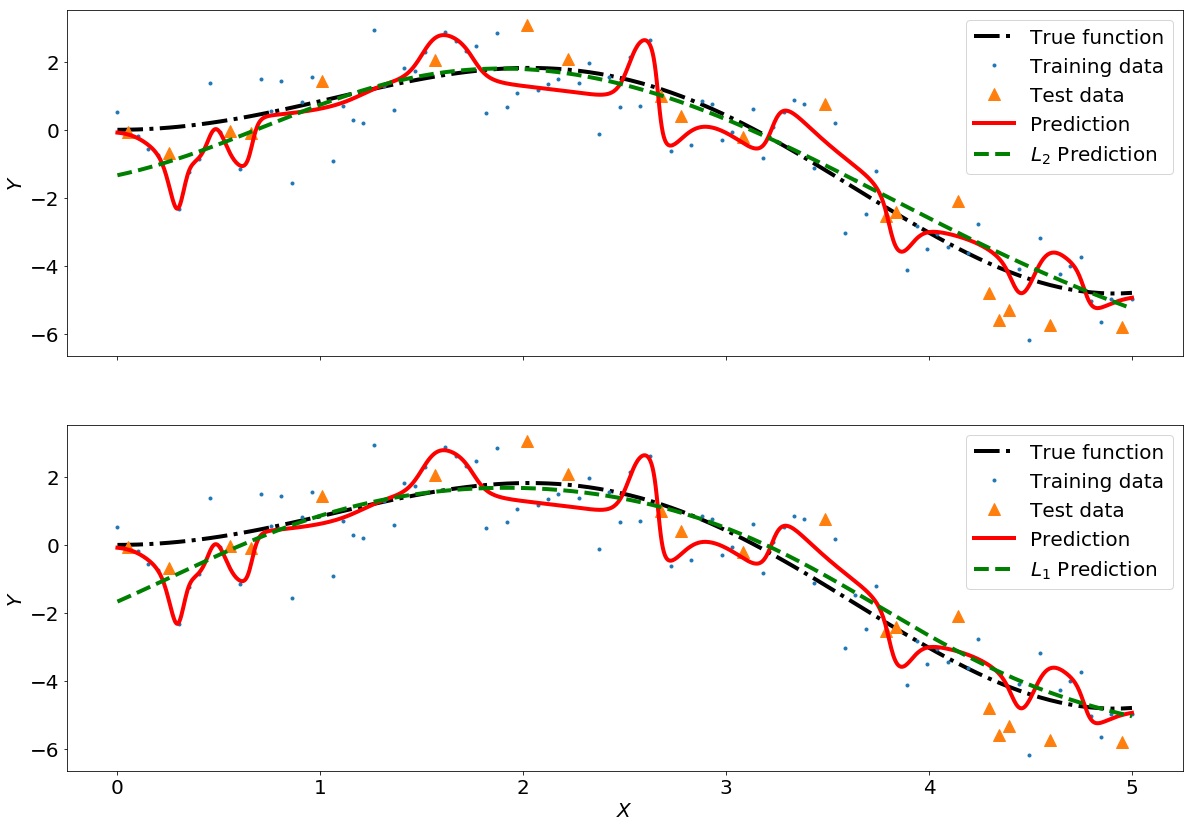

In [15]:
# use our model to predict in the range we want
X_range = np.linspace(0.0, 5, 1000)
y_pred_L2 = model_L2.predict(X_range)

fig, ax = plt.subplots(2, 1, figsize=(20,14), sharex=True)

ax[0].plot(X_true, Y_true, color='k', ls='-.', lw=4, label='True function')
ax[0].plot(X_train, Y_train, '.', label='Training data')
ax[0].plot(X_test, Y_test, ls='', marker='^',  ms=12, label='Test data')
ax[0].plot(X_range, y_pred, lw=4, color='r', label='Prediction')
ax[0].plot(X_range, y_pred_L2, lw=4, ls='--', color='g', label=r'$L_{2}$ Prediction')

ax[0].set_ylabel(r'$Y$', fontsize=20)
ax[0].tick_params(labelsize=20)

ax[0].legend(loc=1, fontsize=20)



y_pred_L1 = model_L1.predict(X_range)

ax[1].plot(X_true, Y_true, color='k', ls='-.', lw=4, label='True function')
ax[1].plot(X_train, Y_train, '.', label='Training data')
ax[1].plot(X_test, Y_test, ls='', marker='^',  ms=12, label='Test data')
ax[1].plot(X_range, y_pred, lw=4, color='r', label='Prediction')
ax[1].plot(X_range, y_pred_L1, lw=4, ls='--', color='g', label=r'$L_{1}$ Prediction')

ax[1].set_xlabel(r'$X$', fontsize=20)
ax[1].set_ylabel(r'$Y$', fontsize=20)
ax[1].tick_params(labelsize=20)

ax[1].legend(loc=1, fontsize=20)

plt.show()

# Early Stopping
The results without any regularization do not look right.  $L_{2}$ and $L_{1}$ regularizaton helped somewhat, but the results still aren't convincing.

We can gain some more insight by plotting the loss functions from the training and validation set.  Let's use a `log-log` scale to enhance any discrepancies between the two curves.

First, a reminder.

Remember that the `fit` method can store the history of the model.  For the unregularized model we stored all the history in the name `no_reg`.  Let's see what attributes are in that object.

In [16]:
dir(no_reg)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

There is a lot of stuff; most of it we're not interested in.  However, at the very end of the list, we see some useful keys.  Let's access some of them.

In [17]:
type(no_reg.history)

dict

Looks like `history` is a dictionary.  Let's take a look at it's keys.

In [18]:
no_reg.history.keys()

dict_keys(['val_loss', 'loss'])

Very cool.  There is a `validation` and `training` loss.  

That's the one we'll want to use right now, but we can look at the other attributes too just to get a feel.

In [19]:
type(no_reg.validation_data)

list

In [20]:
type(no_reg.params)

dict

In [21]:
no_reg.params.keys()

dict_keys(['batch_size', 'epochs', 'steps', 'samples', 'verbose', 'do_validation', 'metrics'])

In [22]:
no_reg.params['batch_size']

64

Okay, that was fun and informative.  But what we're really after is the loss data as a function of epoch number.  Here we go.

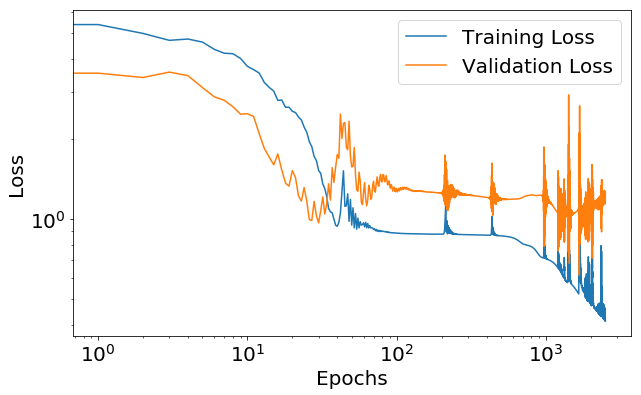

In [23]:
L = no_reg.history['loss']
L_val = no_reg.history['val_loss']

fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(L, label='Training Loss')
ax.plot(L_val, label='Validation Loss')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Epochs', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

Wow.  That is striking.

We used $2500$ epochs, but the validation loss begins to rise at around $50$ epochs and becomes larger than the training loss at around $70$ epochs.  After that, we're basically overfitting.

Notice that the training loss keeps decreasing.  We're fitting the training data better and better all the time.  The validation loss is getting larger and larger meaning that we're losing generalizability.

We can use this new information to our advantage!

## Exercise

### Part 1
Train a network without any penalization, but this time stop after $20$ epochs.

### Part 2
Train a network without any penalization, but this time stop at the "optimal" number of epochs (based on the crossing of the loss curves).

**Deliverables**
* Plot the following on a single figure:
  - The true solution
  - The model prediction without any regularization (after $2500$ epochs)
  - The model prediction without any regularization using $20$ epochs
  - The model prediction without any regularization using the optimal number of epochs
* You may also want to include the training and validation data on the same plot.  Be careful that the plot doesn't become too cluttered.

In [24]:
num_layers = 5
N = 100

input_dim = 1

model = models.Sequential()

model.add(layers.Dense(N, input_dim=input_dim, activation='relu'))

# Create hidden layers
for h in range(num_layers):
    model.add(layers.Dense(N, activation='relu'))
    
model.add(layers.Dense(1, activation='linear'))

In [25]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [26]:
no_reg_20 = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_split=0.2)

Train on 64 samples, validate on 16 samples
Epoch 1/20
64/64 [==============================] - 0s 7ms/step - loss: 5.6850 - val_loss: 4.3010
Epoch 2/20
64/64 [==============================] - 0s 93us/step - loss: 5.4600 - val_loss: 4.1267
Epoch 3/20
64/64 [==============================] - 0s 74us/step - loss: 5.2879 - val_loss: 3.9640
Epoch 4/20
64/64 [==============================] - 0s 57us/step - loss: 5.1291 - val_loss: 3.8122
Epoch 5/20
64/64 [==============================] - 0s 54us/step - loss: 4.9815 - val_loss: 3.6669
Epoch 6/20
64/64 [==============================] - 0s 76us/step - loss: 4.8420 - val_loss: 3.5258
Epoch 7/20
64/64 [==============================] - 0s 66us/step - loss: 4.7103 - val_loss: 3.3956
Epoch 8/20
64/64 [==============================] - 0s 162us/step - loss: 4.5926 - val_loss: 3.2867
Epoch 9/20
64/64 [==============================] - 0s 142us/step - loss: 4.5014 - val_loss: 3.2074
Epoch 10/20
64/64 [==============================] - 0s 76us/ste

In [27]:
X_range = np.linspace(0.0, 5, 1000)
y_pred_20 = model.predict(X_range)

In [28]:
num_layers = 5
N = 100

input_dim = 1

model = models.Sequential()

model.add(layers.Dense(N, input_dim=input_dim, activation='relu'))

# Create hidden layers
for h in range(num_layers):
    model.add(layers.Dense(N, activation='relu'))
    
model.add(layers.Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

no_reg_75 = model.fit(X_train, Y_train, epochs=75, batch_size=64, validation_split=0.2)

Train on 64 samples, validate on 16 samples
Epoch 1/75
64/64 [==============================] - 1s 9ms/step - loss: 5.5814 - val_loss: 4.2742
Epoch 2/75
64/64 [==============================] - 0s 68us/step - loss: 5.4333 - val_loss: 4.1437
Epoch 3/75
64/64 [==============================] - 0s 78us/step - loss: 5.3041 - val_loss: 4.0190
Epoch 4/75
64/64 [==============================] - 0s 68us/step - loss: 5.1810 - val_loss: 3.8716
Epoch 5/75
64/64 [==============================] - 0s 48us/step - loss: 5.0383 - val_loss: 3.6972
Epoch 6/75
64/64 [==============================] - 0s 70us/step - loss: 4.8703 - val_loss: 3.5241
Epoch 7/75
64/64 [==============================] - 0s 56us/step - loss: 4.7081 - val_loss: 3.3718
Epoch 8/75
64/64 [==============================] - 0s 84us/step - loss: 4.5720 - val_loss: 3.2516
Epoch 9/75
64/64 [==============================] - 0s 132us/step - loss: 4.4736 - val_loss: 3.1815
Epoch 10/75
64/64 [==============================] - 0s 136us/ste

In [29]:
y_pred_75 = model.predict(X_range)

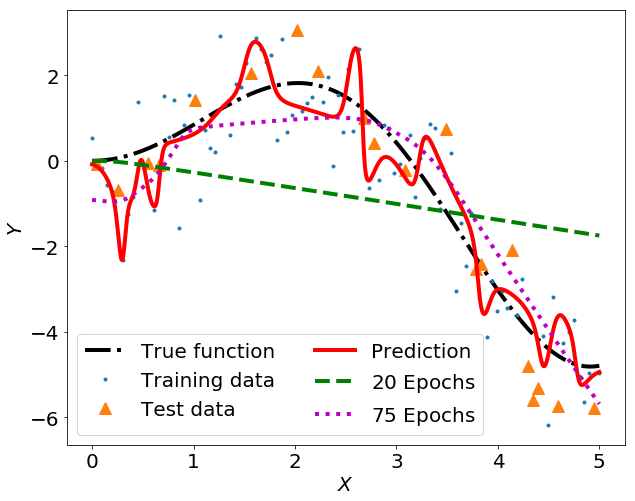

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))

ax.plot(X_true, Y_true, color='k', ls='-.', lw=4, label='True function')
ax.plot(X_train, Y_train, '.', label='Training data')
ax.plot(X_test, Y_test, ls='', marker='^',  ms=12, label='Test data')
ax.plot(X_range, y_pred, lw=4, color='r', label='Prediction')
ax.plot(X_range, y_pred_20, lw=4, ls='--', color='g', label=r'$20$ Epochs')
ax.plot(X_range, y_pred_75, lw=4, ls=':', color='m', label=r'$75$ Epochs')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.tick_params(labelsize=20)

ax.legend(loc=3, ncol=2, fontsize=20)

plt.show()

Let's try to do things more systematically.

How do you think early stopping should be implemented?

To do early stopping in `Keras`, you specify the `EarlyStopping` [*callback*](https://keras.io/callbacks/).  From the documentation:
> A callback is a set of functions to be applied at given stages of the training procedure.

Callbacks can be used to view internal states and statistic of the model during training.

Right now, we'll use one to monitor the validation loss function.  When the validation loss starts to go up, the training process will stop.

#### Basic Syntax
To specify a callback, you just pass a `callbacks` list into the model `fit()` method, like this:
```python
from keras.callbacks import EarlyStopping

model.fit(X_train, Y_train, epochs=2500, batch_size=64, validation_split=0.2, 
          callbacks=[EarlyStopping(monitor='val_loss', patience=5)])
```

## Exercise
Fit the model using the early stopping technique.  Try different values for `patience` to see which one gives you the lowest validation loss.

How many epochs are needed?

In [31]:
from keras.callbacks import EarlyStopping

num_layers = 5
N = 100

input_dim = 1

model = models.Sequential()

model.add(layers.Dense(N, input_dim=input_dim, activation='relu'))

# Create hidden layers
for h in range(num_layers):
    model.add(layers.Dense(N, activation='relu'))
    
model.add(layers.Dense(1, activation='linear'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit model
no_reg_ES = model.fit(X_train, Y_train, epochs=2500, batch_size=64, validation_split=0.2, 
                     callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

Train on 64 samples, validate on 16 samples
Epoch 1/2500
64/64 [==============================] - 1s 8ms/step - loss: 5.5357 - val_loss: 4.1557
Epoch 2/2500
64/64 [==============================] - 0s 66us/step - loss: 5.3162 - val_loss: 3.9106
Epoch 3/2500
64/64 [==============================] - 0s 64us/step - loss: 5.0770 - val_loss: 3.6994
Epoch 4/2500
64/64 [==============================] - 0s 60us/step - loss: 4.8734 - val_loss: 3.5102
Epoch 5/2500
64/64 [==============================] - 0s 85us/step - loss: 4.6960 - val_loss: 3.3440
Epoch 6/2500
64/64 [==============================] - 0s 109us/step - loss: 4.5474 - val_loss: 3.2187
Epoch 7/2500
64/64 [==============================] - 0s 50us/step - loss: 4.4472 - val_loss: 3.1557
Epoch 8/2500
64/64 [==============================] - 0s 91us/step - loss: 4.4162 - val_loss: 3.1568
Epoch 9/2500
64/64 [==============================] - 0s 85us/step - loss: 4.4521 - val_loss: 3.1769
Epoch 10/2500
64/64 [==========================

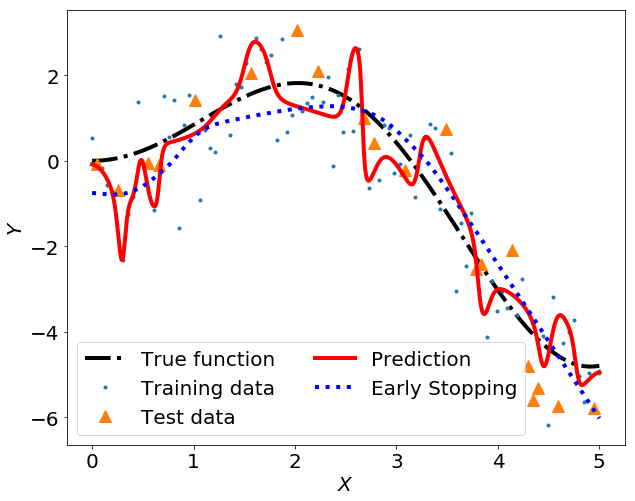

In [32]:
y_pred_ES = model.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=(10,8))

ax.plot(X_true, Y_true, color='k', ls='-.', lw=4, label='True function')
ax.plot(X_train, Y_train, '.', label='Training data')
ax.plot(X_test, Y_test, ls='', marker='^',  ms=12, label='Test data')
ax.plot(X_range, y_pred, lw=4, color='r', label='Prediction')
ax.plot(X_range, y_pred_ES, lw=4, ls=':', color='b', label=r'Early Stopping')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.tick_params(labelsize=20)

ax.legend(loc=3, ncol=2, fontsize=20)

plt.show()

The solution should looks pretty good.  Of course, we had to play with the `patience` parameter.